# Drug Consumption Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import skopt
from skopt.space import Integer
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objs as go
import plotly.offline as py

## Data Overview:

In [2]:
# Drug User Classificaiton Data Set from UCI Machine Learning Repository
df = pd.read_csv("~/Desktop/Winter_2020/Cogs_118A/FinalProject/Cogs118A_FinalProject/Data/drug_users.csv")
df.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

**About this Data Set**:  

**Used with permission of instructor**

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day. (1)

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day". (1)

**Target features**:  

 -  Each of the 18 drugs in the data set can be classified as follows:
     - CL0 Never Used 
     - CL1 Used over a Decade Ago 
     - CL2 Used in Last Decade 
     - CL3 Used in Last Year 
     - CL4 Used in Last Month 
     - CL5 Used in Last Week 
     - CL6 Used in Last Day 
   
**Feature Values**:  
 - **ID**: number of record in originial database
 - **Age**: age of participant corresponding to values:
     - Value: -0.95197 Age: 18-24
     - Value: -0.07854 Age: 25-34
     - Value: 0.49788 Age: 35-44
     - Value: 1.09449 Age: 45-54
     - Value: 1.82213 Age: 55-64
     - Value: 2.59171 Age: 65+
 - **Gender**: gender of the participant corresponding to values:
     - Value: 0.48246 Gender: Female
     - Value: -0.48246 Gender: Male
 - **Education**: level of education of the participant corresponding to values:
     - Value: 2.43591 Education: Left school before 16 years
     - Value: -1.73790 Education: Left school at 16 years
     - Value: -1.43719 Education: Left school at 17 years
     - Value: -1.22751 Education: Left school at 18 years
     - Value: -0.61113 Education: Some college or university, no certificate or degree
     - Value: -0.05921 Education: Professional certificate/diploma
     - Value: 0.45468 Education: University degree
     - Value: 1.16365 Education: Masters degree
     - Value: 1.98437 Education: Doctorate degree
 - **Country**: country of residence of the participant corresponding to values:
     - Value: -0.09765 Country: Australia
     - Value: 0.24923 Country: Canada
     - Value: -0.46841 Country: New Zealand
     - Value: -0.28519 Country: Other
     - Value: 0.21128 Country: Republic of Ireland
     - Value: 0.96082 Country: UK
     - Value: -0.57009 Country: USA  
 - **Ethnicity**: ethnicity of the participant corresponing to values:
     - Value: -0.50212 Ethnicity: Asian
     - Value: -1.10702 Ethnicity: Black
     - Value: 1.90725 Ethnicity: Mixed-Black/Asian
     - Value: 0.12600 Ethnicity: Mixed-White/Asian
     - Value: -0.22166 Ethnicity: Mixed-White/Black
     - Value: 0.11440 Ethnicity: Other
     - Value: -0.31685 Ethnicity: White

 - **Nscore**: NEO-FFI-R Neuroticism. Neuroticism, one of the Big 5 personality traits, is typically defined as a tendency toward anxiety, depression, self-doubt, vulenrability, and experience dramatic shifts in mood.(2) Possible values are:

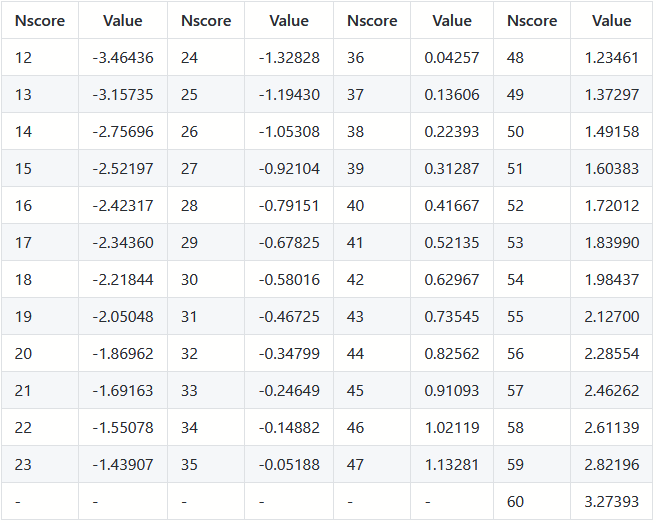

 - **Escore**: NEO-FFI-R Extraversion. Extraversion, one of the Big 5 personality traits. It indicates how outgoing and social a person is. They enjoy being with people, participating in social gatherings, and are full of energy.(2) Possible values are:

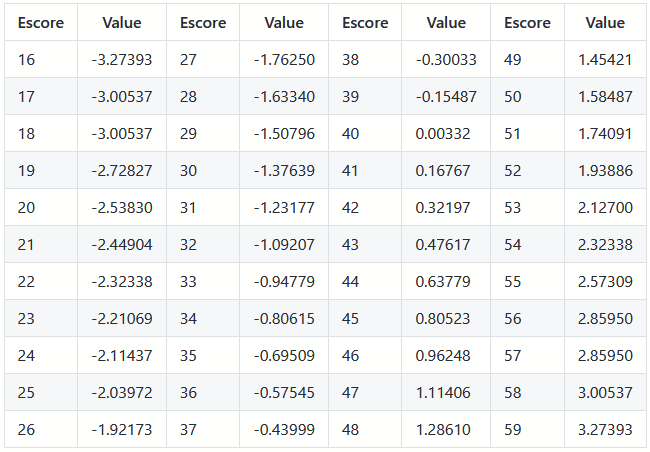

 - **Oscore**: NEO-FFI-R Openness to experience. Openess is one of the Big 5 personality traits. It indicates how open-minded a person is. Persons with high level of openess enjoy trying new things. They tend to be curious, imaginative, and open-minded. Persons who are low in openess do not enjoy trying new things, are close-minded, unimaginative, and like routines.(2) Possible values are: 

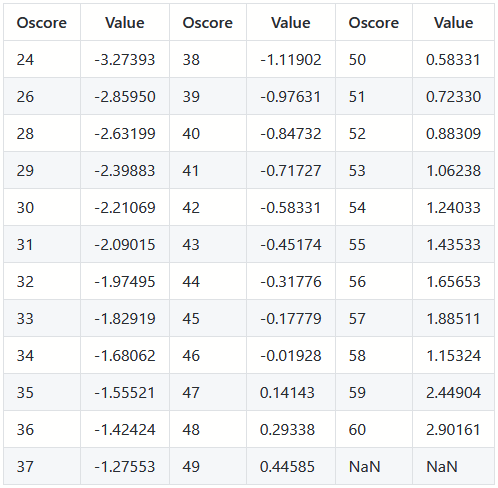

 - **Ascore**: NEO-FFI-R Agreeableness. Agreeableness is one of the Big 5 personality traits. Persons who are agreeable tend to be friendly, warm, trusting, and empathetic. Persons who low in agreeableness are more skeptical, demanding, insulting, stubborn, and show a lack of empathy.(2) Possible values are:

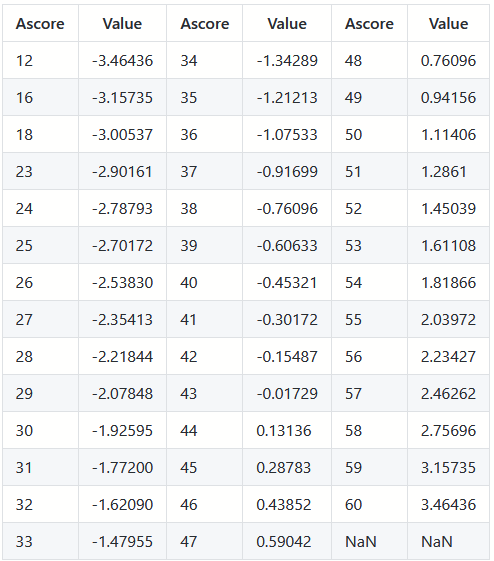

- **Cscore**: NEO-FFI-R Conscientiousness. Conscientiousness is one of the Big 5 personality traits. Persons who are high in conscientiousness tend to be competent, organized, achievement-oriented, and self-disciplined. Persons who are low in conscientiousness tend to be disorganized, careless, procrastinaters, undisciplned, and impulsive.(2) Possible values are: 

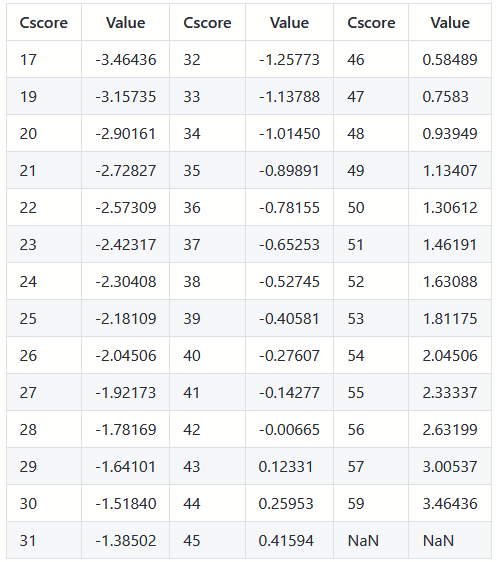

- **Impulsive**: impulsiveness measured by BIS-11. Impulsiveness is a tendency to act in the spur of a moment, displaying behavior which can be charactierized by small amounts to no forethought, reflection, or consideration of consequence. Possible values are: 
     - Value: -2.55524 Fraction: 1.06%
     - Value: -1.37983 Fraction: 14.64%
     - Value: -0.71126 Fraction: 16.29%
     - Value: -0.21712 Fraction: 18.83%
     - Value: 0.19268 Fraction: 13.63%
     - Value: 0.52975 Fraction: 11.46%
     - Value: 0.88113 Fraction: 10.34%
     - Value: 1.29221 Fraction: 7.85%
     - Value: 1.86203 Fraction: 5.52%
     - Value: 2.90161 Fraction: 0.37%


 - **SS**: sensation measured by ImpSS. Sensation occurs when sensory receptors detect sensory stimuli. Perception involves the organization, interpretation, and conscious exeprience of those sensations. In other words, senses provide the basis for perception. Possible values are: 
     - Value: -2.07848 Fraction: 3.77%
     - Value: -1.54858 Fraction: 4.62%
     - Value: -1.18084 Fraction: 7.00%
     - Value: -0.84637 Fraction: 8.97%
     - Value: -0.52593 Fraction: 11.19%
     - Value: -0.21575 Fraction: 11.83%
     - Value: 0.07987 Fraction: 11.62%
     - Value: 0.40148 Fraction: 13.21%
     - Value: 0.76540 Fraction: 11.19%
     - Value: 1.22470 Fraction: 11.14%
     - Value: 1.92173 Fraction: 5.46%

Source:   
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29 (1)  
https://www.simplypsychology.org/big-five-personality.html (2) 

## Exploratory Data Analysis

In [3]:
# creating copy of df
df_copy = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [5]:
df.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

In [6]:
df.describe()

ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460     1.984370     0.960820   

         Ethnicity       Nscore       Escore       Oscore       Ascore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean     -0.309577     0.000047    -0.000163    -0.000534    -0.000245   
std       0.166226     0.998106     0.997448     0.996229     0.997440   
min      -1.107020    -3.464360    -3.273930    -3.273930    -3.464360   
25%      -0.316850    -0.678250    -0.695090    -0.717270    -0.606330   
50%      -0.316850     0.042570     0.003320    -0.019280    -0.017290   
75%      -0.316850     0.629670     0.637790     0.723300     0.760960   
max       1.907250     3.273930     3.273930     2.901610     3.464360   

            Cscore    Impulsive           SS  
count  1885.000000  1885.000000  1885.000000  
mean     -0.000386     0.007216    -0.003292  
std       0.997523     0.954435     0.963701  
min      -3.464360    -2.555240    -2.078480  
25%      -0.652530    -0.711260    -0.525930  
50%      -0.006650    -0.217120     0.079870  
75%       0.584890     0.529750     0.765400  
max       3.464360     2.901610     1.921730

In [7]:
df.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [8]:
df.shape

(1885, 32)

### Data Preprocessing

In [9]:
target_columns = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']

cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 
      'User_Coke', 'User_Crack','User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 
      'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']


In [10]:
# Encode target columns into numeric data
from sklearn.preprocessing import LabelEncoder
for column in target_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [11]:
# encode the target columns in df copy
for column in target_columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])

In [12]:
df.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  \
0 -0.58331 -0.91699  ...        0       0         0       0    0     0   
1  1.43533  0.76096  ...        4       0         2       0    2     3   
2 -0.84732 -1.62090  ...        0       0         0       0    0     0   
3 -0.01928  0.59042  ...        0       0         2       0    0     0   
4 -0.45174 -0.30172  ...        1       0         0       1    0     0   

   Mushrooms  Nicotine  Semer  VSA  
0          0         2      0    0  
1          0         4      0    0  
2          1         0      0    0  
3          0         2      0    0  
4          2         2      0    0  

[5 rows x 32 columns]

In [13]:
# create new column for each drug and provide information on whether or not that person is a current user
for i in range(len(target_columns)):
    df_copy.loc[((df_copy[target_columns[i]]==0) | (df_copy[target_columns[i]]==1)),cp[i]] = 'Non-user'
    df_copy.loc[((df_copy[target_columns[i]]==2) | (df_copy[target_columns[i]]==3) | (df_copy[target_columns[i]]==4) | (df_copy[target_columns[i]]==5) | (df_copy[target_columns[i]]==6)),cp[i]] = 'User'

In [14]:
df_copy.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  User_Ecstasy  User_Heroin  User_Ketamine  \
0 -0.58331 -0.91699  ...      Non-user     Non-user       Non-user   
1  1.43533  0.76096  ...          User     Non-user           User   
2 -0.84732 -1.62090  ...      Non-user     Non-user       Non-user   
3 -0.01928  0.59042  ...      Non-user     Non-user           User   
4 -0.45174 -0.30172  ...      Non-user     Non-user       Non-user   

   User_Legalh  User_LSD  User_Meth  User_Mushrooms  User_Nicotine  \
0     Non-user  Non-user   Non-user        Non-user           User   
1     Non-user      User       User        Non-user           User   
2     Non-user  Non-user   Non-user        Non-user       Non-user   
3     Non-user  Non-user   Non-user        Non-user           User   
4     Non-user  Non-user   Non-user            User           User   

   User_Semer  User_VSA  
0    Non-user  Non-user  
1    Non-user  Non-user  
2    Non-user  Non-user  
3    Non-user  Non-user  
4    Non-user  Non-user  

[5 rows x 51 columns]

### Data Visualization

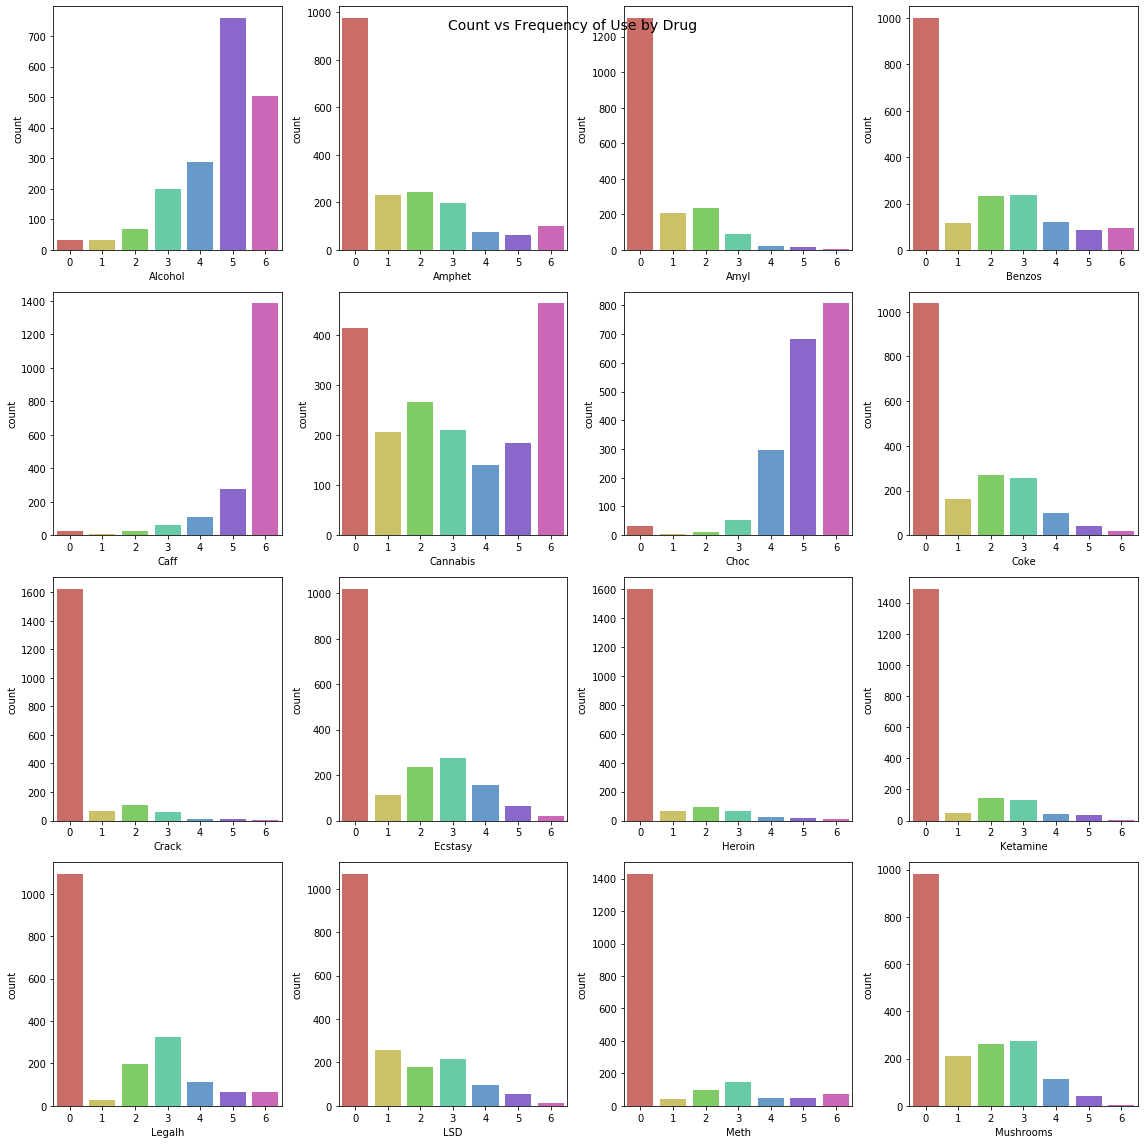

In [15]:
fig, axes = plt.subplots(4,4,figsize = (16,16))
fig.suptitle("Count vs Frequency of Use by Drug",fontsize=14)
k=0
for i in range(4):
    for j in range(4):
        sns.countplot(x=target_columns[k], data=df_copy,ax=axes[i][j], palette = 'hls')
        k+=1

plt.tight_layout()
plt.show()

In [16]:
user_count = []
non_user_count = []

for i in range(len(target_columns)):
    sort = df_copy.groupby([cp[i]])[target_columns[i]].count()
    user_count.append(sort[1])
    non_user_count.append(sort[0])    

user_bar = go.Bar(x=target_columns, y=user_count, name='User', marker = dict(color = "rgb(240, 129, 161)"))

non_user_bar = go.Bar(x=target_columns, y=non_user_count, name='Non-User', marker = dict(color = "rgb(117,127,221)"))

data = [user_bar, non_user_bar]

layout = go.Layout(title = 'Drugs vs User or Non-User', 
                   yaxis= dict(title='Count', ticklen = 5, gridwidth = 2), 
                   barmode = 'group')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='groupedbar')

 - Chocolate is the drug with the most users
 - Caffeine is the drug with the second most users
 - Alcohol is the drug with the third most users

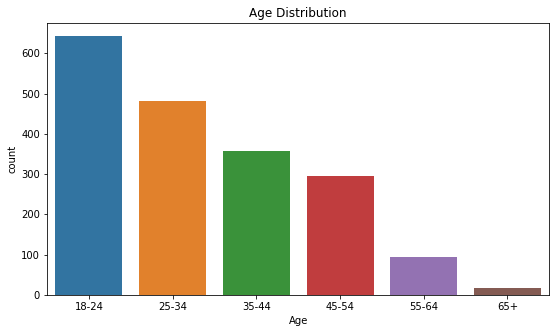

In [17]:
fig, ax  = plt.subplots(figsize = (9,5))
sns.set_style=('darkgrid')
ages = ['18-24', '25-34','35-44','45-54','55-64','65+']
sns.countplot(x='Age', data=df, ax=ax)
ax.set_xticklabels(ages)
ax.set_title('Age Distribution');

In [18]:
df['Country'].unique

<bound method Series.unique of 0       0.96082
1       0.96082
2       0.96082
3       0.96082
4       0.96082
         ...   
1880   -0.57009
1881   -0.57009
1882   -0.57009
1883   -0.57009
1884    0.21128
Name: Country, Length: 1885, dtype: float64>

### Drugs by Country

In [19]:
countries = [-0.09765, 0.24923, -0.46841, -0.28519, 0.21128, 0.96082, -0.57009]
cl = ['Country']
df_country = df_copy

df_country['Country'] = df_country['Country'].replace([-0.09765],'Australia')
df_country['Country'] = df_country['Country'].replace([0.24923],'Canada')
df_country['Country'] = df_country['Country'].replace([-0.46841000000000005],'New Zealand')
df_country['Country'] = df_country['Country'].replace([-0.28519],'Other')
df_country['Country'] = df_country['Country'].replace([0.21128000000000002],'Republic of Ireland')
df_country['Country'] = df_country['Country'].replace([0.9608200000000001],'UK')
df_country['Country'] = df_country['Country'].replace([-0.57009],'USA')


In [20]:
df_country['Country'].unique()

array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

In [21]:
df_country.head()

ID      Age   Gender  Education Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921      UK    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437      UK   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921      UK   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365      UK   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437      UK   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  User_Ecstasy  User_Heroin  User_Ketamine  \
0 -0.58331 -0.91699  ...      Non-user     Non-user       Non-user   
1  1.43533  0.76096  ...          User     Non-user           User   
2 -0.84732 -1.62090  ...      Non-user     Non-user       Non-user   
3 -0.01928  0.59042  ...      Non-user     Non-user           User   
4 -0.45174 -0.30172  ...      Non-user     Non-user       Non-user   

   User_Legalh  User_LSD  User_Meth  User_Mushrooms  User_Nicotine  \
0     Non-user  Non-user   Non-user        Non-user           User   
1     Non-user      User       User        Non-user           User   
2     Non-user  Non-user   Non-user        Non-user       Non-user   
3     Non-user  Non-user   Non-user        Non-user           User   
4     Non-user  Non-user   Non-user            User           User   

   User_Semer  User_VSA  
0    Non-user  Non-user  
1    Non-user  Non-user  
2    Non-user  Non-user  
3    Non-user  Non-user  
4    Non-user  Non-user  

[5 rows x 51 columns]

In [22]:
countries = ['UK','USA','Canada','Australia','Ireland','New Zealand']

In [23]:
data = [dict(type='choropleth',locations = countries,locationmode='country names',
             z=(df['Country'].value_counts().values),text=countries,colorscale='portland',
             reversescale=False,)]

layout = dict(title = 'Drug Addiction Populations in Each Country',
              geo = dict(showframe=False,showcoastlines=True, projection=dict(type='Mercator')))

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world-map')

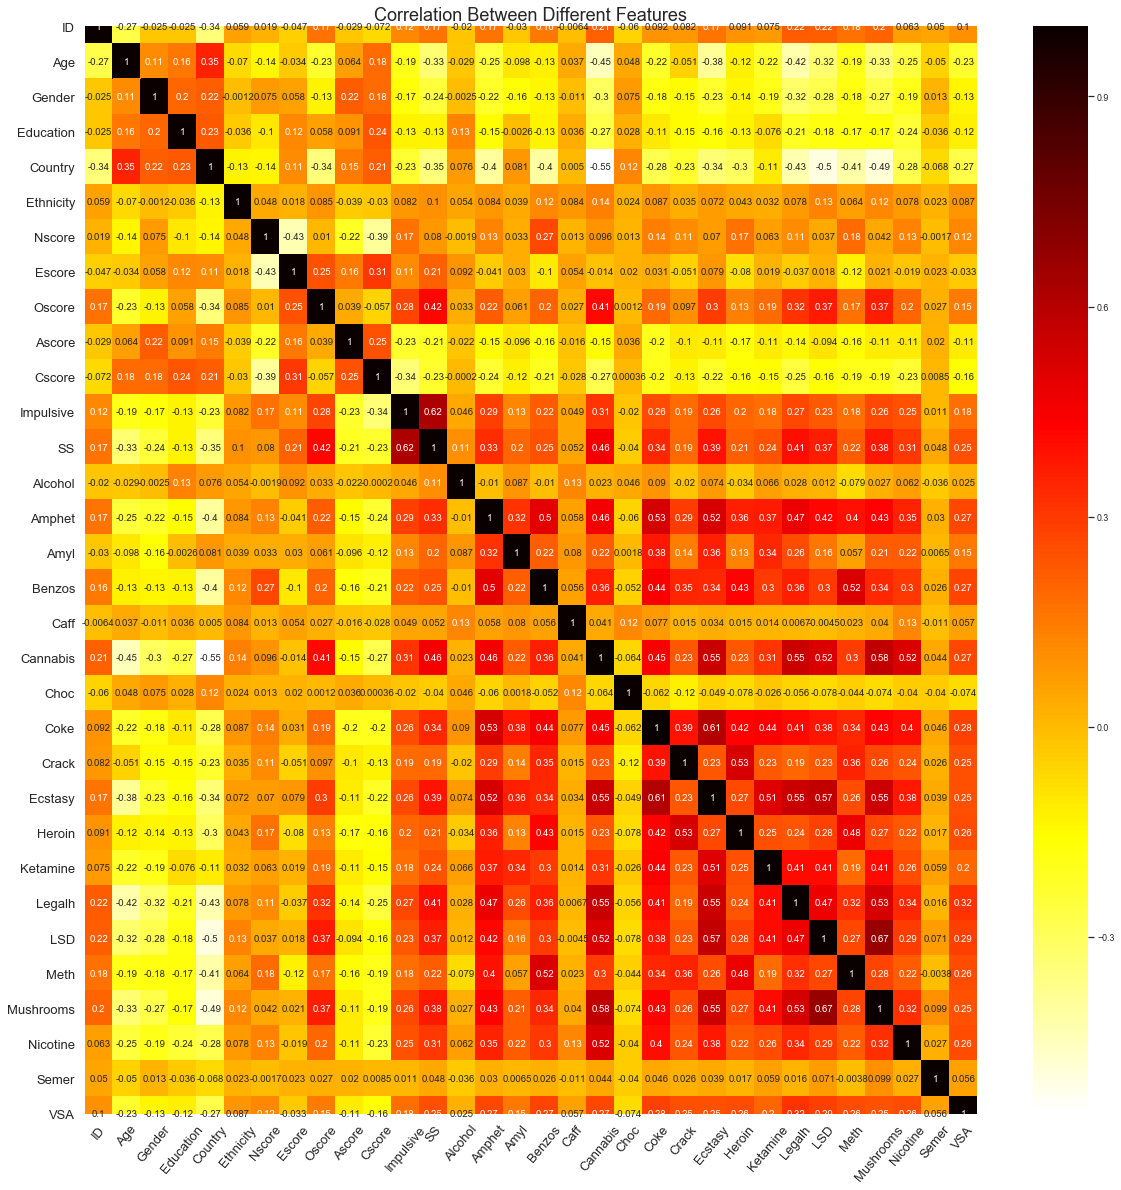

In [24]:
corrplot = df.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale = .8)

heat_map = sns.heatmap(corrplot, cmap = 'hot_r',annot=True, yticklabels=df.columns, xticklabels=df.columns)

plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title('Correlation Between Different Features', fontsize=18)
plt.show()

Correlation pleiades originated from Russian evolutionists P.V. Terentjev and I.I. Schmalhausen in 1931 (3). Pleiades are based on the presence of correlations between some quantitative characteristics. The presence of correlations between the dimensions of some parts of the data and the absence of correlations between the other parts indicate the independence of certain features within the same data. The pleiades are a manifestation of differentiation. (4)   
  
**Pleiades of Drugs**:  
- **The Heroin Pleiad**: crack, coacine, methadone, and heroin
- **The Ecstasy Pleiad**: amphetamines, cannabis, coacine, ketamine, LSD, magic mushrooms, legal highs, and ecstasy
- **The Benzodiazepine Pleiad**: methadone, amphetamines, and cocaine
  
Source:  
https://www.semanticscholar.org/paper/Acquired-Traits%3A-Memoirs-of-a-Geneticist-from-the-Berg/3c2e7d2763da06838eeabec49589ffb346d041fe?p2df (3)  
https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1558-5646.1960.tb03076.x (4)

# Model Implemenation (Cannabis Users)

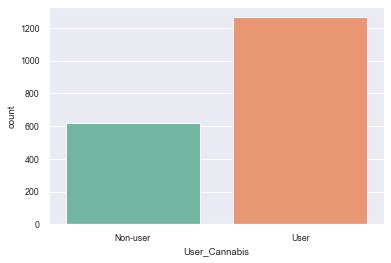

In [25]:
# plot frequency of edible and poisonous mushrooms
sns.countplot(x="User_Cannabis", data=df_copy, palette="Set2")
plt.show()

### Import Grid + Helper Functions

Refer to functions.py for documentation on how functions work throughout the notebook

In [26]:
from Drug_acc import *
from Drug_prec import *
from plot_learning_curve import *

### Data Preprocessing

In [27]:
for column in target_columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in df_copy:
    df_copy[col] = le.fit_transform(df_copy[col])

# Splitting the data into training/testing
feature_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

X = df[feature_columns].values
y = df_copy['User_Cannabis'].values

# Trial 1

In [29]:
# To store results of models in trial 1
t1_accu_dict = {}

t1_train_dict = {}
t1_test_dict = {}

t1_optimal_train_dict = {}
t1_optimal_test_dict = {}

In [30]:
from sklearn.model_selection import train_test_split
# split the data into testing and training sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, train_size = 0.8, test_size=0.20, random_state=42)

print("Shape of input data X_train: {} and shape of target variable y_train: {}".format(X1_train.shape, y1_train.shape))
print("Shape of input data X_test: {} and shape of target variable y_test: {}".format(X1_test.shape, y1_test.shape))

Shape of input data X_train: (1508, 12) and shape of target variable y_train: (1508,)
Shape of input data X_test: (377, 12) and shape of target variable y_test: (377,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [31]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X1_train, y1_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 90.64% | outer ACC 72.19%
outer fold 1/5 | tuning KNN      | inner ACC 85.13% | outer ACC 82.45%
outer fold 1/5 | tuning Logistic | inner ACC 85.23% | outer ACC 82.78%
outer fold 1/5 | tuning RandomForest | inner ACC 83.60% | outer ACC 81.79%
outer fold 2/5 | tuning DecisionTree | inner ACC 90.55% | outer ACC 68.54%
outer fold 2/5 | tuning KNN      | inner ACC 85.12% | outer ACC 81.46%
outer fold 2/5 | tuning Logistic | inner ACC 85.12% | outer ACC 84.11%
outer fold 2/5 | tuning RandomForest | inner ACC 83.38% | outer ACC 82.45%
outer fold 3/5 | tuning DecisionTree | inner ACC 90.41% | outer ACC 66.56%
outer fold 3/5 | tuning KNN      | inner ACC 85.47% | outer ACC 78.48%
outer fold 3/5 | tuning Logistic | inner ACC 85.72% | outer ACC 78.81%
outer fold 3/5 | tuning RandomForest | inner ACC 84.66% | outer ACC 77.81%
outer fold 4/5 | tuning DecisionTree | inner ACC 89.71% | outer ACC 70.10%
outer fold 4/5 | tuning KNN      | inner ACC 85.3

Accuracy 81.30% (average over CV test folds)
Best Parameters: {'classifier__n_neighbors': 165, 'classifier__weights': 'distance'}
Training Accuracy: 100.00%
Test Accuracy: 79.58%
Wall time: 1min 35s


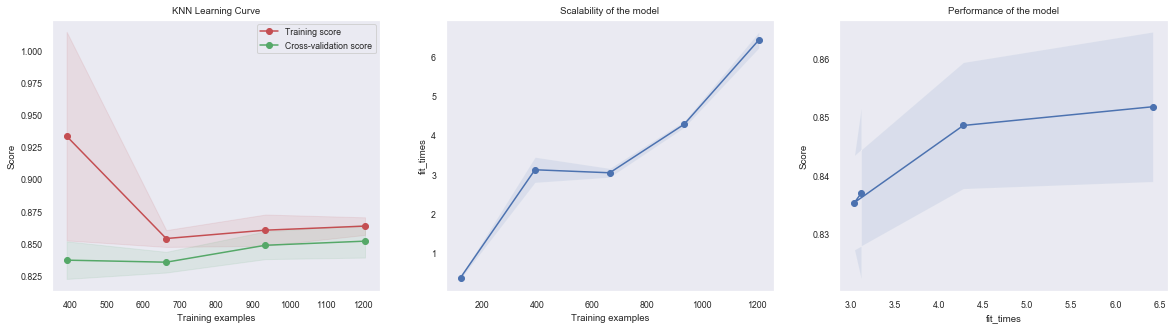

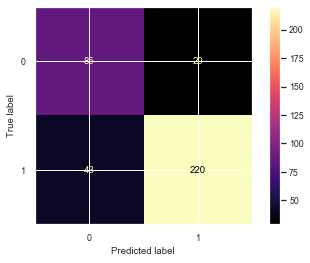

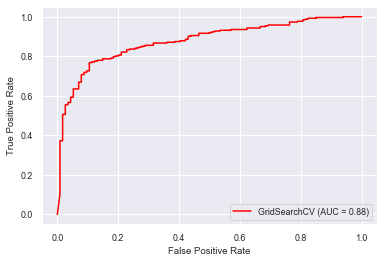

In [32]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t1_algo('KNN'), 'KNN', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'KNN Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X1_test, y1_test, c ='red');

Accuracy 81.56% (average over CV test folds)
Best Parameters: {'classifier__max_features': 4}
Training Accuracy: 100.00%
Test Accuracy: 80.11%
Wall time: 7min 54s


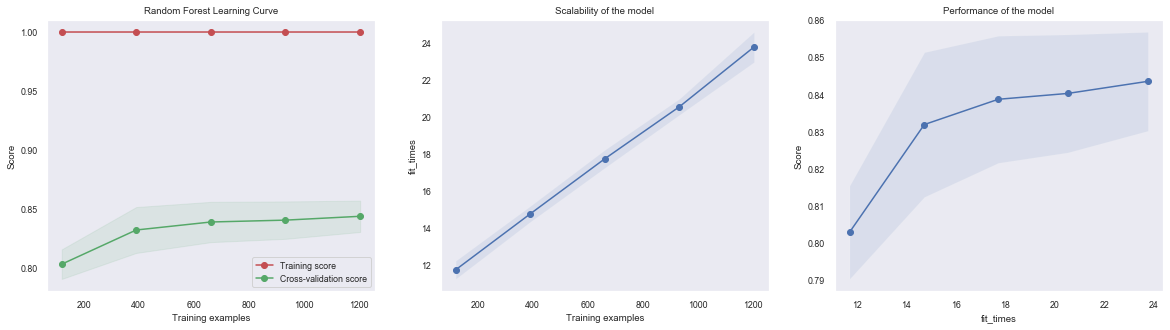

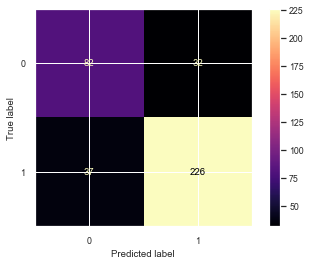

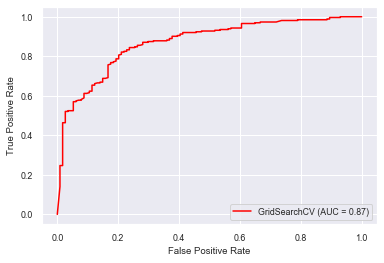

In [33]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t1_algo('RandomForest'), 'RandomForest', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'RandomForest Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X1_test, y1_test, c ='red');

Accuracy 81.63% (average over CV test folds)
Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Training Accuracy: 81.83%
Test Accuracy: 80.37%
Wall time: 8.93 s


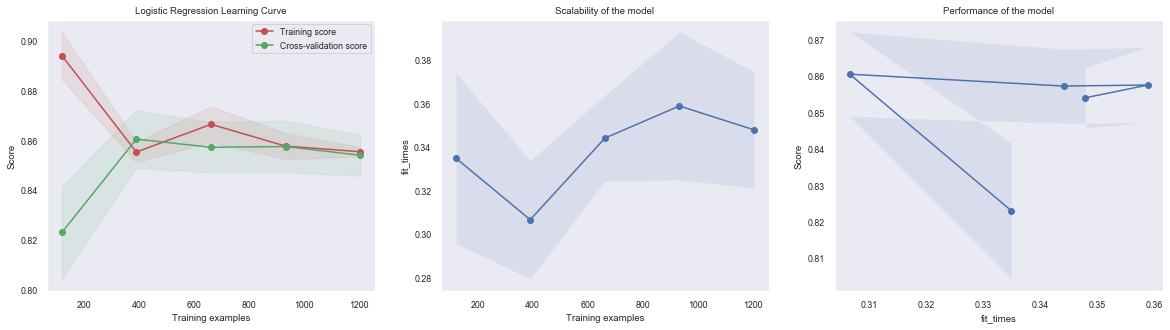

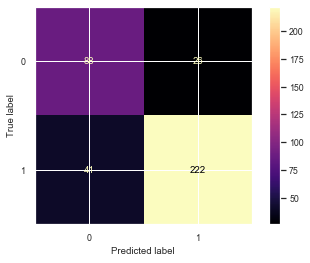

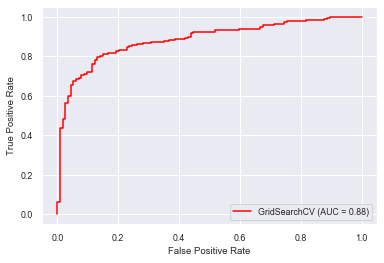

In [34]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t1_algo('Logistic'), 'Logistic', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Logistic Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X1_test, y1_test, c ='red');

Accuracy 78.71% (average over CV test folds)
Best Parameters: {'classifier__max_depth': 4}
Training Accuracy: 81.43%
Test Accuracy: 77.45%
Wall time: 7.52 s


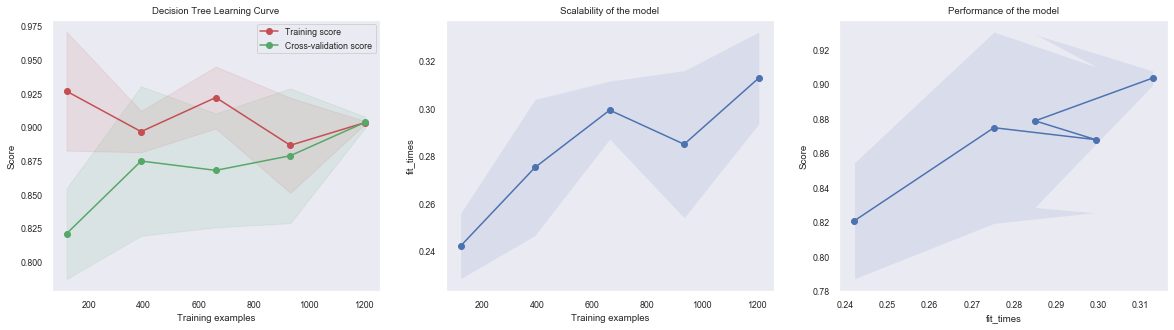

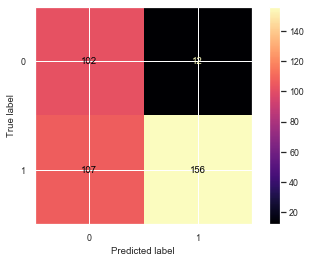

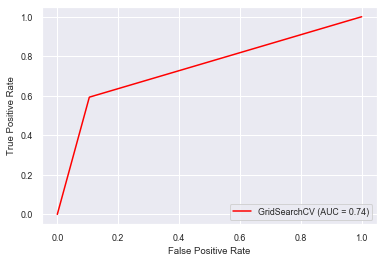

In [35]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t1_algo('DecisionTree'), 'DecisionTree', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'DecisionTree Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X1_test, y1_test, c ='red');

In [37]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('distance', 75, 12, 1, 1, 'l2', X1_train, y1_train, X1_test, y1_test,t1_optimal_train_dict,t1_optimal_test_dict)

KNN Train Accuracy 0.8010450815163583
KNN Test Accuracy 0.7771883289124668
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       114
           1       0.86      0.81      0.84       263

    accuracy                           0.78       377
   macro avg       0.74      0.75      0.74       377
weighted avg       0.79      0.78      0.78       377

Random Forest Train Accuracy 0.8103298057248465
Random Forest Test Accuracy 0.8090185676392573
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       114
           1       0.88      0.84      0.86       263

    accuracy                           0.81       377
   macro avg       0.77      0.79      0.78       377
weighted avg       0.81      0.81      0.81       377

Logistic Train Accuracy 0.8156212184550394
Logistic Test Accuracy 0.8010610079575596
              precision    recall  f1-score   support

           0       0.68      0.66   

## Precision Performance

### Model 'refit' set to precision

In [38]:
train_algo_prec(gridcvs, X1_train, y1_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 90.64% | outer prec 89.80%
outer fold 1/5 | tuning KNN      | inner prec 85.13% | outer prec 87.00%
outer fold 1/5 | tuning Logistic | inner prec 85.23% | outer prec 85.31%
outer fold 1/5 | tuning RandomForest | inner prec 84.08% | outer prec 83.80%
outer fold 2/5 | tuning DecisionTree | inner prec 90.55% | outer prec 89.55%
outer fold 2/5 | tuning KNN      | inner prec 85.12% | outer prec 84.04%
outer fold 2/5 | tuning Logistic | inner prec 85.12% | outer prec 84.93%
outer fold 2/5 | tuning RandomForest | inner prec 83.32% | outer prec 83.78%
outer fold 3/5 | tuning DecisionTree | inner prec 90.41% | outer prec 89.60%
outer fold 3/5 | tuning KNN      | inner prec 85.47% | outer prec 86.89%
outer fold 3/5 | tuning Logistic | inner prec 85.72% | outer prec 86.17%
outer fold 3/5 | tuning RandomForest | inner prec 84.54% | outer prec 83.51%
outer fold 4/5 | tuning DecisionTree | inner prec 89.71% | outer prec 92.97%
outer fold 4/5 | tuning

Precision 81.30% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 87.50%
Wall time: 1min 35s


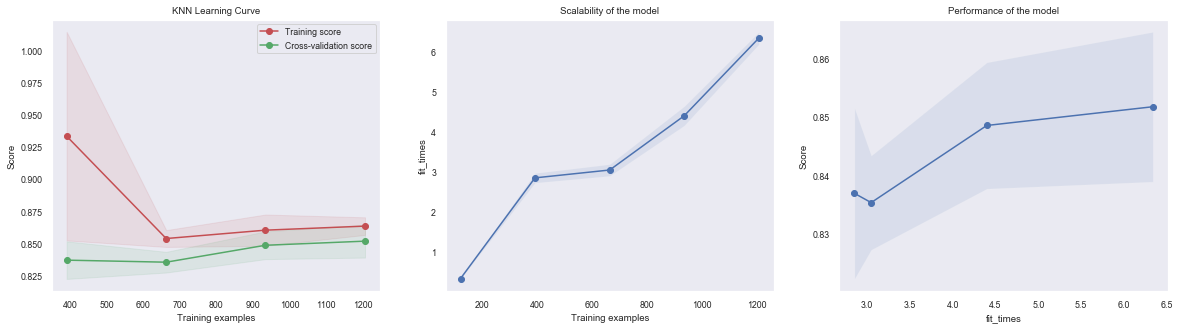

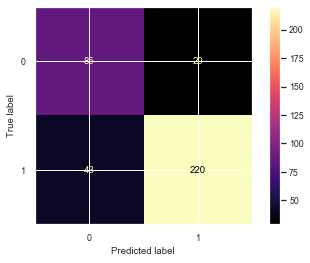

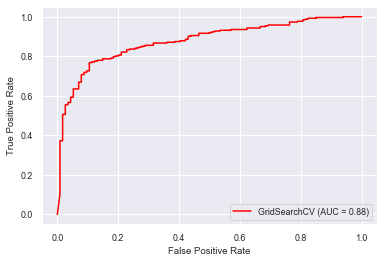

In [39]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('KNN'), 'KNN', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'KNN Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X1_test, y1_test, c ='red');

Precision 81.56% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 87.75%
Wall time: 8min 3s


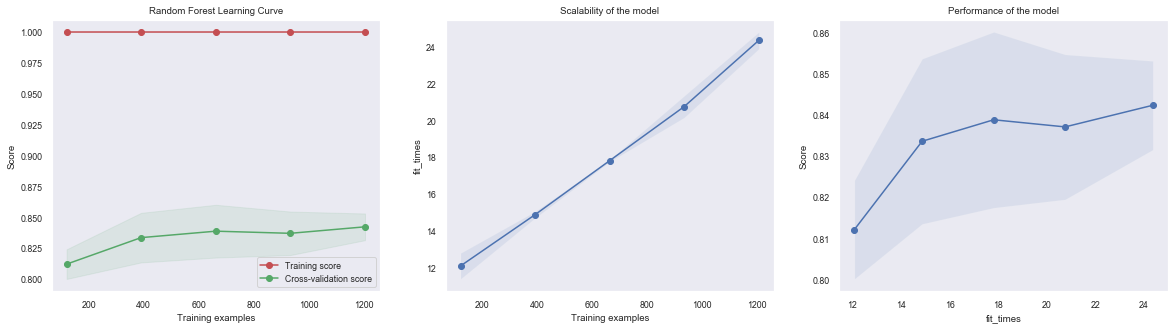

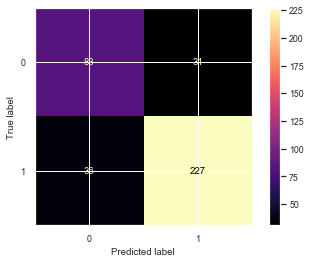

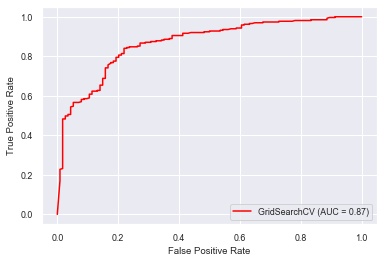

In [40]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('RandomForest'), 'RandomForest', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Random Forest Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X1_test, y1_test, c ='red');

Precision 81.63% (average over CV test folds)
Training Precision: 84.60%
Test Precision: 85.93%
Wall time: 9.09 s


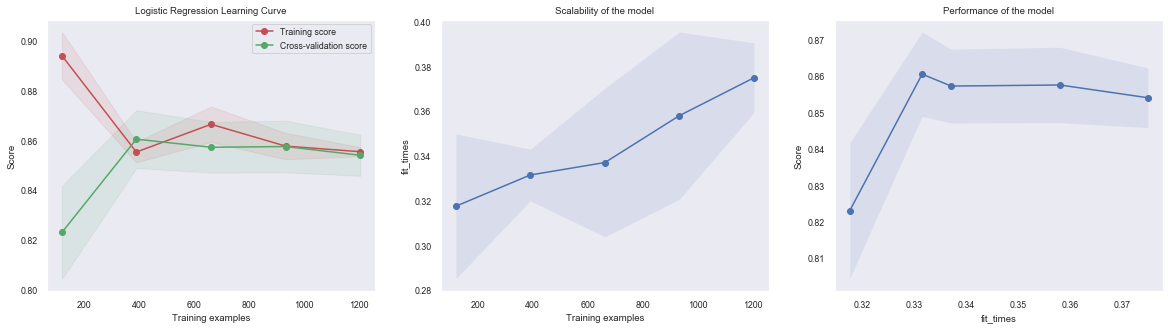

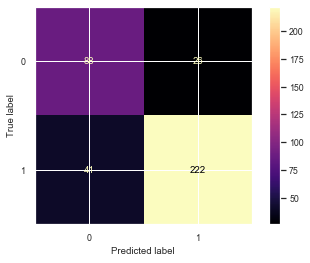

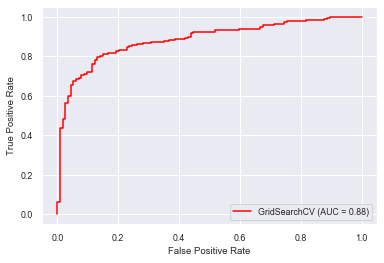

In [41]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('Logistic'), 'Logistic', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Logistic Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X1_test, y1_test, c ='red');

Precision 78.58% (average over CV test folds)
Training Precision: 86.10%
Test Precision: 86.78%
Wall time: 7.7 s


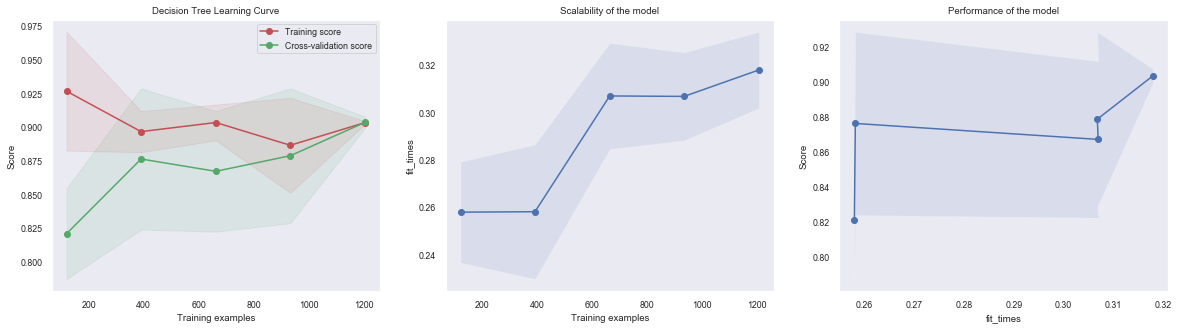

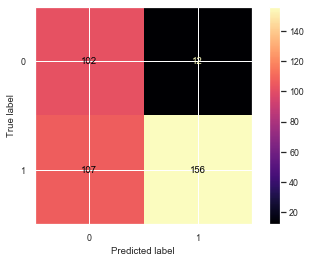

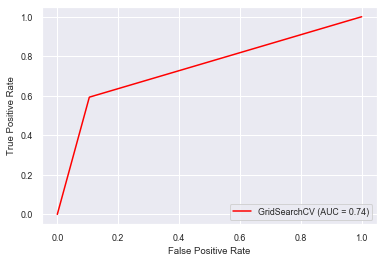

In [42]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('DecisionTree'), 'DecisionTree', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Decision Tree Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X1_test, y1_test, c ='red');

In [43]:
optimized_prec('uniform', 75, 12, 1, 1, 'l2', X1_train, y1_train, X1_test, y1_test,t1_optimal_train_dict,t1_optimal_test_dict)

KNN Train Precision 0.857566765578635
KNN Test Precision 0.8870967741935484
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       114
           1       0.89      0.84      0.86       263

    accuracy                           0.81       377
   macro avg       0.78      0.80      0.78       377
weighted avg       0.82      0.81      0.81       377

Random Forest Train Precision 1.0
Random Forest Test Precision 0.8844621513944223
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       114
           1       0.88      0.84      0.86       263

    accuracy                           0.81       377
   macro avg       0.78      0.79      0.79       377
weighted avg       0.82      0.81      0.82       377

Logistic Train Precision 0.8553149606299213
Logistic Test Precision 0.8906882591093117
              precision    recall  f1-score   support

           0       0.67      0.76      0.71   

# Results: Trial 1

In [44]:
t1_df_accu_dict = pd.DataFrame.from_dict(t1_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_train_dict = pd.DataFrame.from_dict(t1_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_test_dict = pd.DataFrame.from_dict(t1_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_optimal_train_dict = pd.DataFrame.from_dict(t1_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_optimal_test_dict = pd.DataFrame.from_dict(t1_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [45]:
print("Average Accuracy Across Folds")
print(t1_df_accu_dict)
print("")
print("Training Scores")
print(t1_df_train_dict)
print("")
print("Testing Scores")
print(t1_df_test_dict)
print("")
print("Training Scores For Optimal Parameter")
print(t1_df_optimal_train_dict)
print("")
print("Testing Scores For Optimal Parameter")
print(t1_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
Logistic Accuracy        0.816283
Logistic Precision       0.816283
Random Forest Precision  0.815630
RandomForest Accuracy    0.815628
KNN Accuracy             0.812979
KNN Precision            0.812979
DecisionTree Accuracy    0.787116
Decision Tree Precision  0.785787

Training Scores
                                   Score
KNN Training Accuracy           1.000000
RandomForest Training Accuracy  1.000000
KNN Train Precision             1.000000
RandomForest Train Precision    1.000000
DecisionTree Train Precision    0.861000
Logistic Train Precision        0.846008
Logistic Training Accuracy      0.818302
DecisionTree Training Accuracy  0.814324

Testing Scores
                                Score
RandomForest Test Precision  0.877470
KNN Test Precision           0.875000
DecisionTree Test Precision  0.867769
Logistic Test Precision      0.859316
Logistic Test Accuracy       0.803714
RandomForest Test Accuracy   0.801

## Visualizations

### Average Accuracies Across Folds

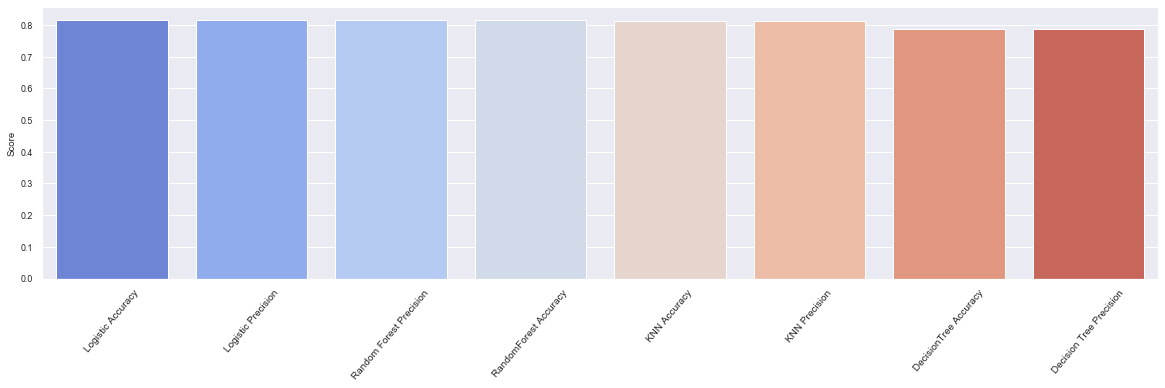

In [46]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_accu_dict.index,y = t1_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores

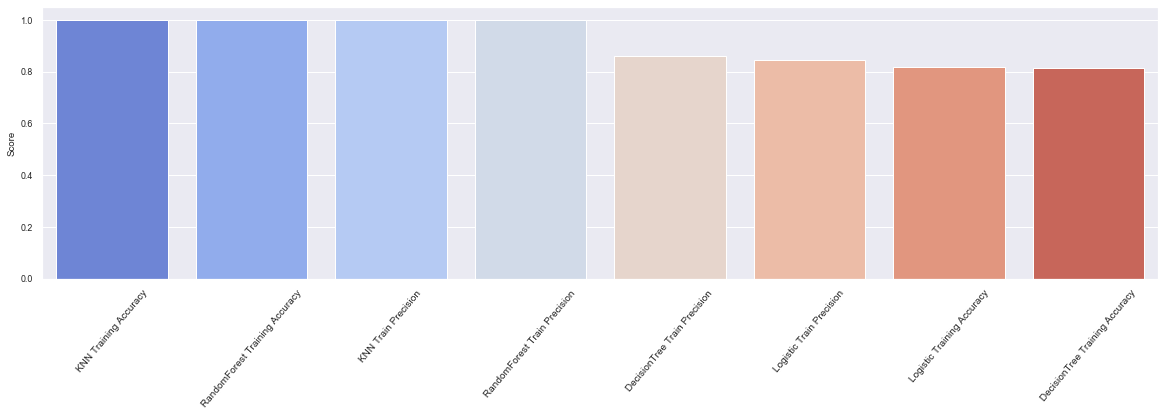

In [47]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_train_dict.index,y = t1_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores

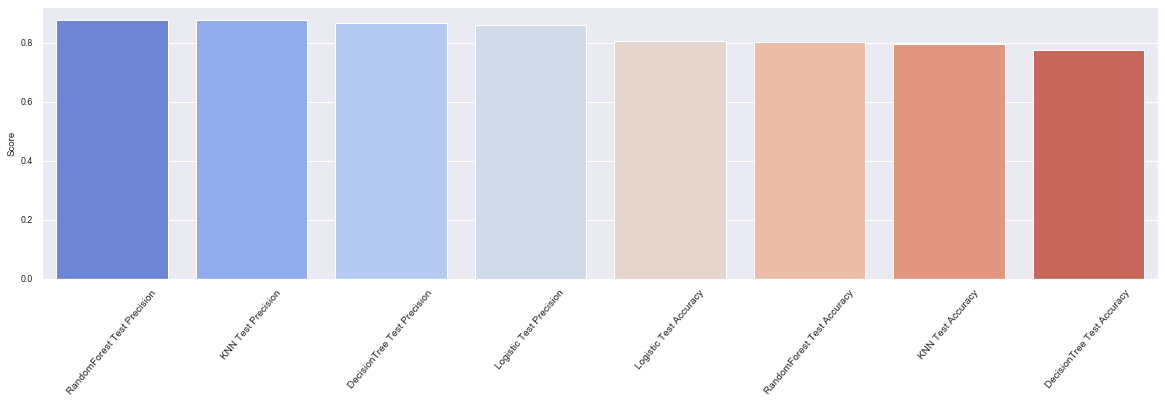

In [48]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_test_dict.index,y = t1_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores With Optimal Hyperparameter

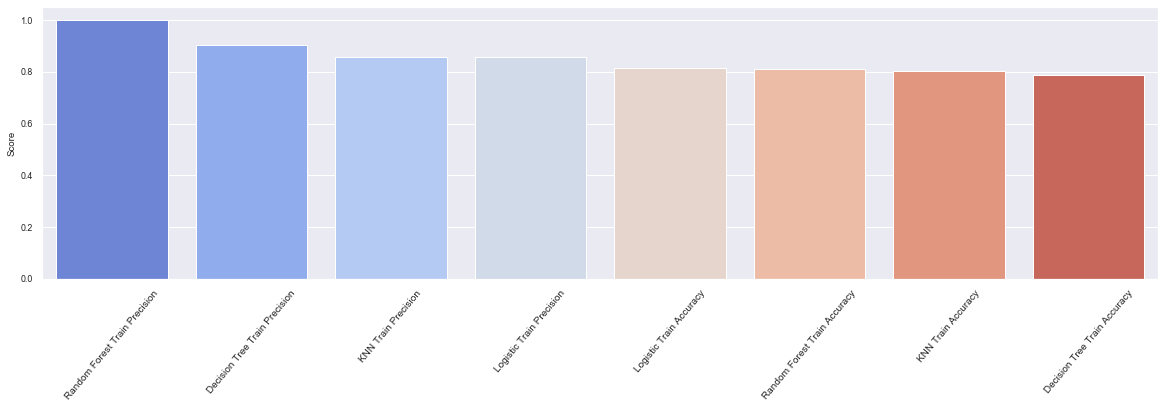

In [49]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_optimal_train_dict.index,y = t1_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores With Optimal Hyperparameter

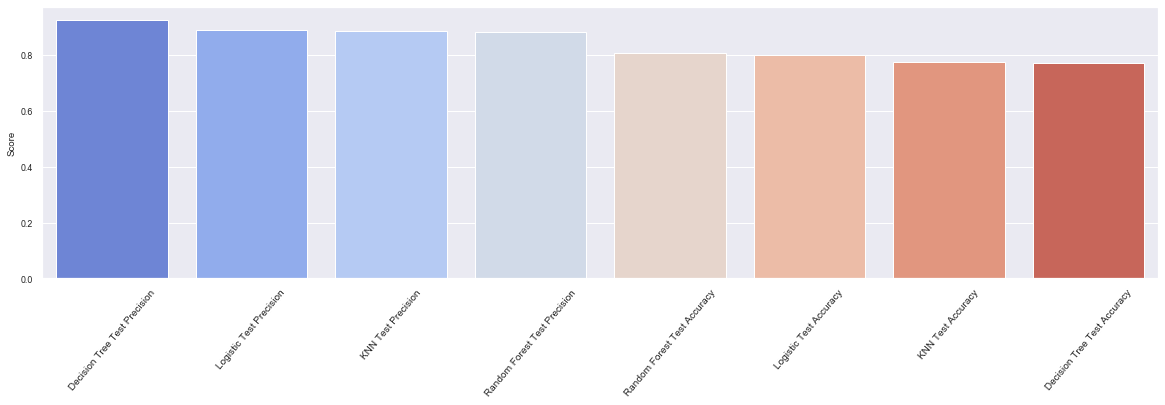

In [50]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_optimal_test_dict.index,y = t1_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

## Trial 2

In [80]:
# To store results of models in trial 1
t2_accu_dict = {}

t2_train_dict = {}
t2_test_dict = {}

t2_optimal_train_dict = {}
t2_optimal_test_dict = {}

In [81]:
# split the data into testing and training sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.20, random_state=221)
print("Shape of input data X_train: {} and shape of target variable y_train: {}".format(X2_train.shape, y2_train.shape))
print("Shape of input data X_test: {} and shape of target variable y_test: {}".format(X2_test.shape, y2_test.shape))

Shape of input data X_train: (1508, 12) and shape of target variable y_train: (1508,)
Shape of input data X_test: (377, 12) and shape of target variable y_test: (377,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [82]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X2_train, y2_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 91.03% | outer ACC 69.21%
outer fold 1/5 | tuning KNN      | inner ACC 85.36% | outer ACC 75.50%
outer fold 1/5 | tuning Logistic | inner ACC 86.26% | outer ACC 78.15%
outer fold 1/5 | tuning RandomForest | inner ACC 84.71% | outer ACC 78.81%
outer fold 2/5 | tuning DecisionTree | inner ACC 90.24% | outer ACC 70.20%
outer fold 2/5 | tuning KNN      | inner ACC 84.00% | outer ACC 80.13%
outer fold 2/5 | tuning Logistic | inner ACC 85.71% | outer ACC 81.79%
outer fold 2/5 | tuning RandomForest | inner ACC 83.02% | outer ACC 82.45%
outer fold 3/5 | tuning DecisionTree | inner ACC 86.28% | outer ACC 72.85%
outer fold 3/5 | tuning KNN      | inner ACC 83.95% | outer ACC 82.78%
outer fold 3/5 | tuning Logistic | inner ACC 85.28% | outer ACC 82.45%
outer fold 3/5 | tuning RandomForest | inner ACC 83.87% | outer ACC 81.46%
outer fold 4/5 | tuning DecisionTree | inner ACC 90.67% | outer ACC 71.10%
outer fold 4/5 | tuning KNN      | inner ACC 83.9

Accuracy 80.50% (average over CV test folds)
Best Parameters: {'classifier__n_neighbors': 180, 'classifier__weights': 'distance'}
Training Accuracy: 100.00%
Test Accuracy: 81.43%
Wall time: 1min 38s


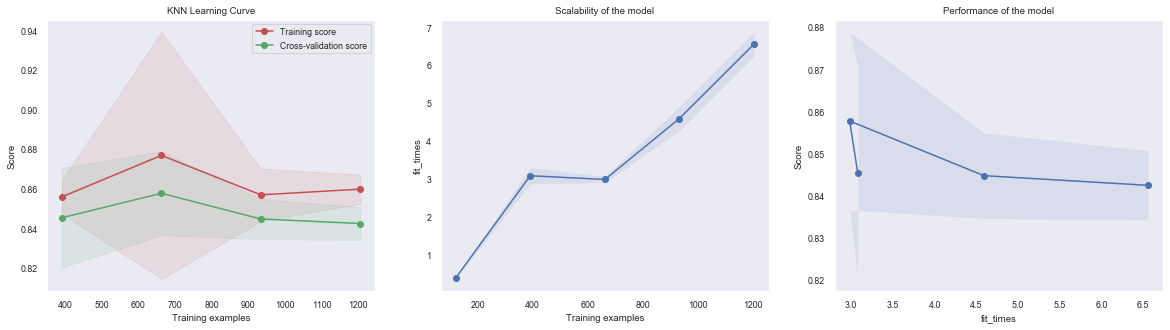

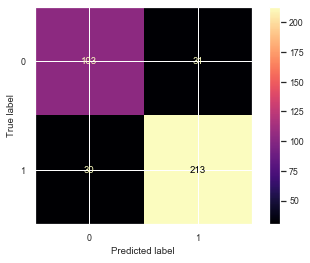

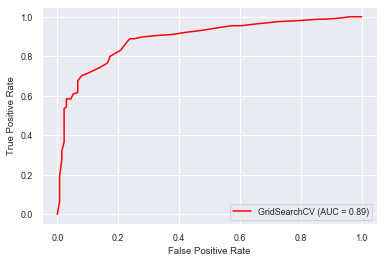

In [54]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t2_algo('KNN'), 'KNN', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'KNN Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X2_test, y2_test, c ='red');

Accuracy 81.10% (average over CV test folds)
Best Parameters: {'classifier__max_features': 12}
Training Accuracy: 100.00%
Test Accuracy: 79.58%
Wall time: 8min


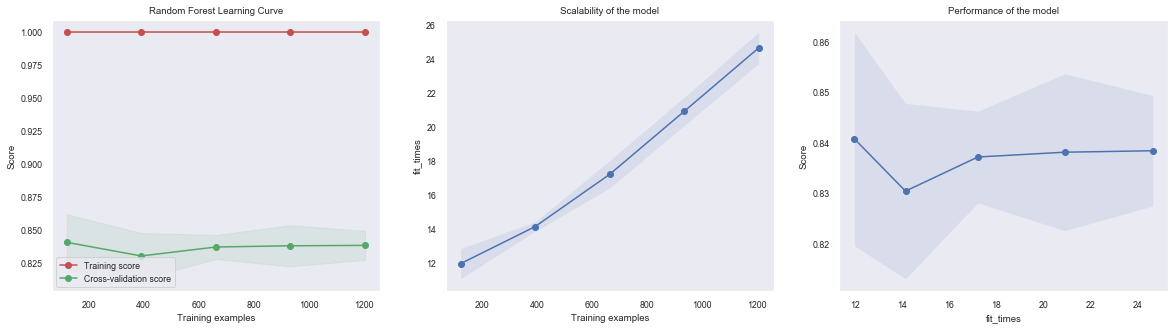

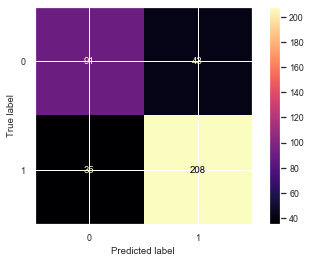

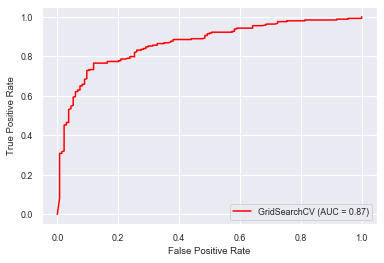

In [55]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t2_algo('RandomForest'), 'RandomForest', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'RandomForest Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X2_test, y2_test, c ='red');

Accuracy 81.57% (average over CV test folds)
Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Training Accuracy: 81.90%
Test Accuracy: 81.70%
Wall time: 9.02 s


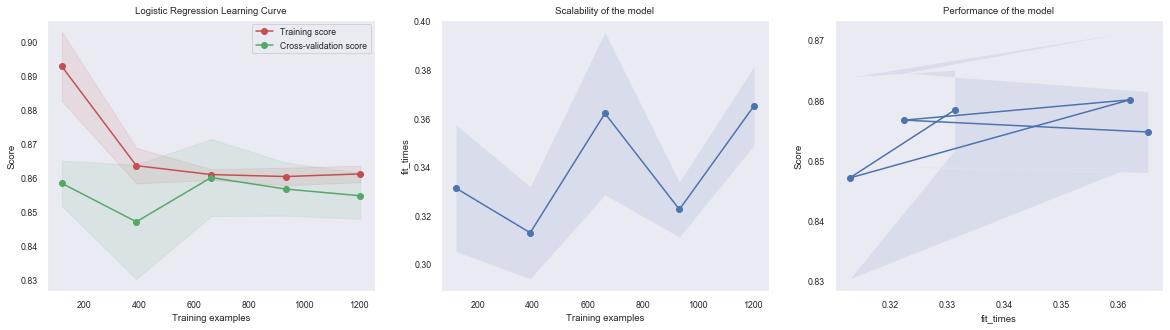

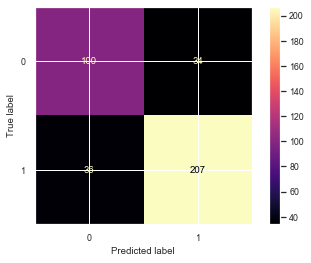

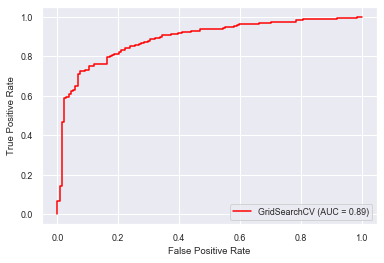

In [56]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t2_algo('Logistic'), 'Logistic', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Logistic Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X2_test, y2_test, c ='red');

Accuracy 79.51% (average over CV test folds)
Best Parameters: {'classifier__max_depth': 5}
Training Accuracy: 83.89%
Test Accuracy: 78.25%
Wall time: 7.58 s


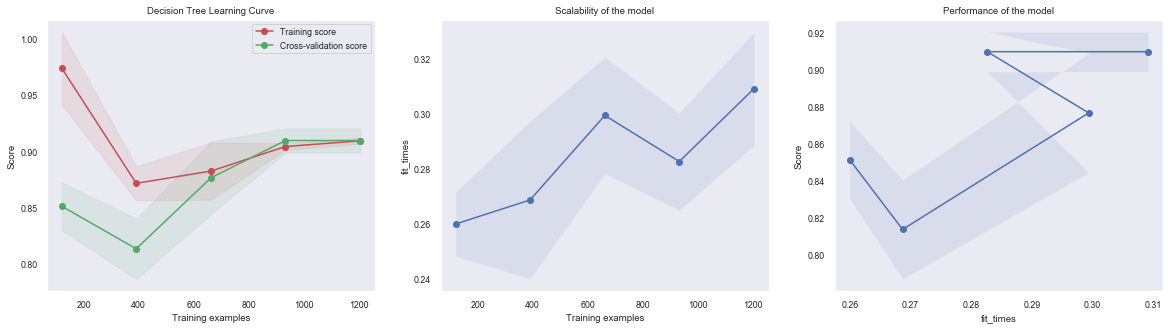

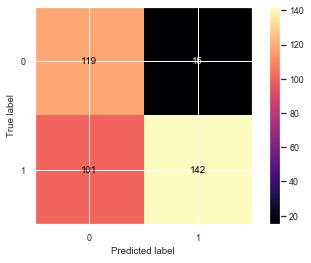

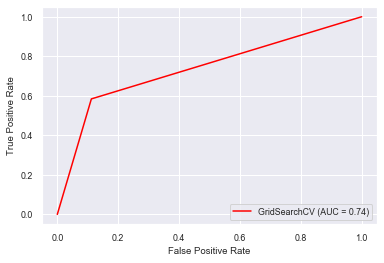

In [57]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t2_algo('DecisionTree'), 'DecisionTree', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'DecisionTree Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X2_test, y2_test, c ='red');

In [58]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('distance', 60, 12, 1, 1, 'l2', X2_train, y2_train, X2_test, y2_test,t2_optimal_train_dict,t2_optimal_test_dict)

KNN Train Accuracy 0.8010582825460386
KNN Test Accuracy 0.8275862068965517
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       134
           1       0.85      0.88      0.87       243

    accuracy                           0.83       377
   macro avg       0.81      0.80      0.81       377
weighted avg       0.83      0.83      0.83       377

Random Forest Train Accuracy 0.8030626388858331
Random Forest Test Accuracy 0.7984084880636605
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       134
           1       0.83      0.86      0.85       243

    accuracy                           0.80       377
   macro avg       0.78      0.77      0.78       377
weighted avg       0.80      0.80      0.80       377

Logistic Train Accuracy 0.8129920133770433
Logistic Test Accuracy 0.8222811671087533
              precision    recall  f1-score   support

           0       0.75      0.75   

## Precision Performance

### Model 'refit' set to precision

In [59]:
train_algo_prec(gridcvs, X2_train, y2_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 91.03% | outer prec 90.58%
outer fold 1/5 | tuning KNN      | inner prec 85.36% | outer prec 83.25%
outer fold 1/5 | tuning Logistic | inner prec 86.26% | outer prec 83.25%
outer fold 1/5 | tuning RandomForest | inner prec 84.51% | outer prec 83.25%
outer fold 2/5 | tuning DecisionTree | inner prec 90.24% | outer prec 93.89%
outer fold 2/5 | tuning KNN      | inner prec 84.00% | outer prec 86.43%
outer fold 2/5 | tuning Logistic | inner prec 85.71% | outer prec 87.13%
outer fold 2/5 | tuning RandomForest | inner prec 83.58% | outer prec 88.00%
outer fold 3/5 | tuning DecisionTree | inner prec 86.28% | outer prec 91.22%
outer fold 3/5 | tuning KNN      | inner prec 83.95% | outer prec 84.55%
outer fold 3/5 | tuning Logistic | inner prec 85.28% | outer prec 84.47%
outer fold 3/5 | tuning RandomForest | inner prec 83.81% | outer prec 82.89%
outer fold 4/5 | tuning DecisionTree | inner prec 90.67% | outer prec 92.09%
outer fold 4/5 | tuning

Precision 80.50% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 83.40%
Wall time: 1min 37s


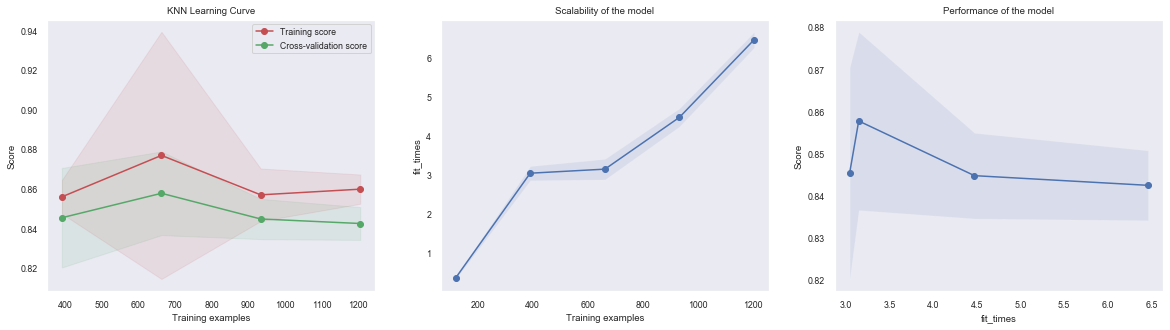

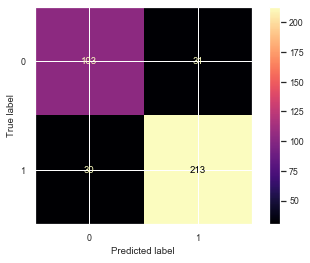

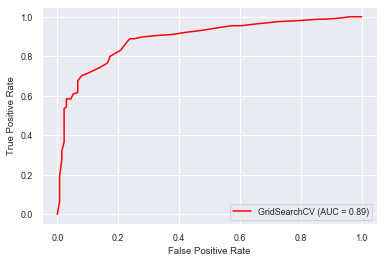

In [60]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('KNN'), 'KNN', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'KNN Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X2_test, y2_test, c ='red');

Precision 81.24% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 82.68%
Wall time: 7min 59s


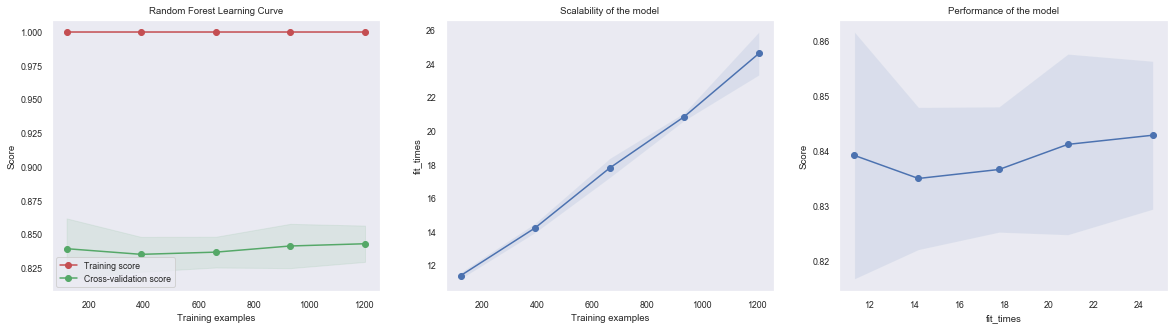

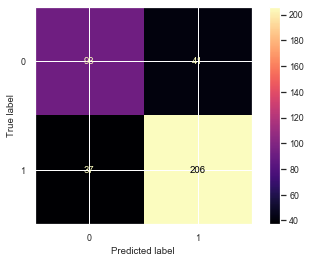

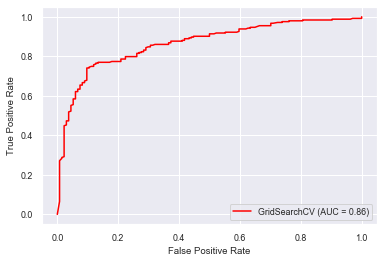

In [61]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('RandomForest'), 'RandomForest', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Random Forest Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X2_test, y2_test, c ='red');

Precision 81.57% (average over CV test folds)
Training Precision: 84.39%
Test Precision: 83.46%
Wall time: 9.02 s


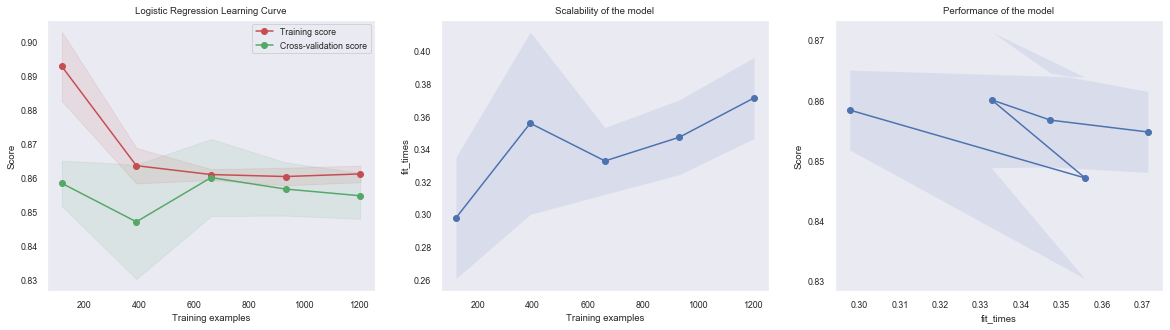

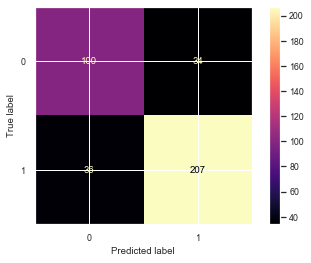

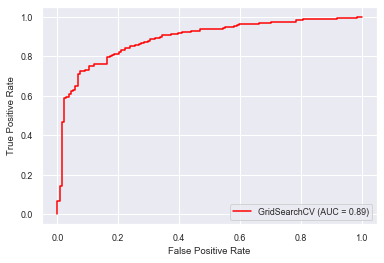

In [62]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('Logistic'), 'Logistic', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Logistic Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X2_test, y2_test, c ='red');

Precision 79.31% (average over CV test folds)
Training Precision: 87.20%
Test Precision: 82.33%
Wall time: 7.75 s


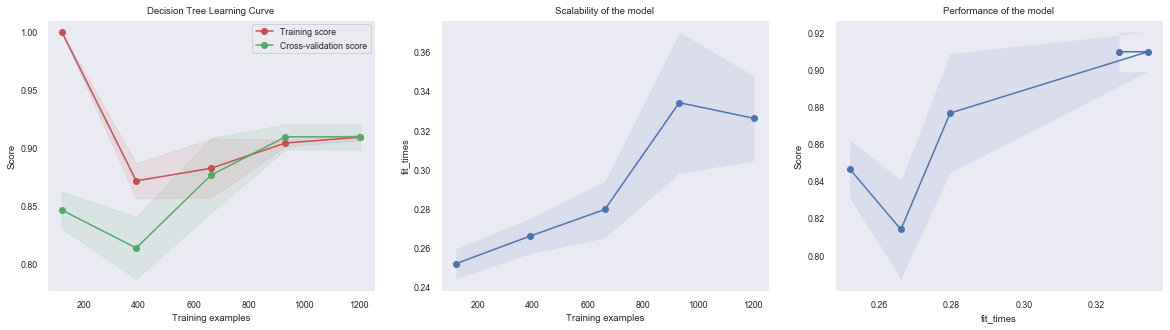

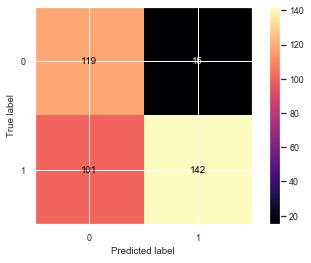

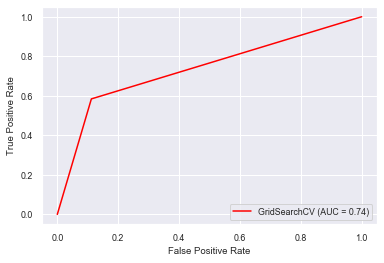

In [63]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('DecisionTree'), 'DecisionTree', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Decision Tree Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X2_test, y2_test, c ='red');

In [64]:
optimized_prec('uniform', 60, 12, 1, 1, 'l2', X2_train, y2_train, X2_test, y2_test,t2_optimal_train_dict,t2_optimal_test_dict)

KNN Train Precision 0.8515325670498084
KNN Test Precision 0.8571428571428571
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       134
           1       0.86      0.86      0.86       243

    accuracy                           0.82       377
   macro avg       0.80      0.80      0.80       377
weighted avg       0.82      0.82      0.82       377

Random Forest Train Precision 1.0
Random Forest Test Precision 0.8274509803921568
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       134
           1       0.83      0.87      0.85       243

    accuracy                           0.80       377
   macro avg       0.78      0.77      0.78       377
weighted avg       0.80      0.80      0.80       377

Logistic Train Precision 0.8601532567049809
Logistic Test Precision 0.8636363636363636
              precision    recall  f1-score   support

           0       0.75      0.75      0.75  

## Results: Trial 2

In [65]:
t2_df_accu_dict = pd.DataFrame.from_dict(t2_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_train_dict = pd.DataFrame.from_dict(t2_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_test_dict = pd.DataFrame.from_dict(t2_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_optimal_train_dict = pd.DataFrame.from_dict(t2_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_optimal_test_dict = pd.DataFrame.from_dict(t2_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [66]:
print("Average Accuracy Across Folds")
print(t2_df_accu_dict)
print("")
print("Training Metric Scores")
print(t2_df_train_dict)
print("")
print("Testing Metric Scores")
print(t2_df_test_dict)
print("")
print("Training Metric Scores For Optimal Parameter")
print(t2_df_optimal_train_dict)
print("")
print("Testing Metric Scores For Optimal Parameter")
print(t2_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
Logistic Accuracy        0.815654
Logistic Precision       0.815654
Random Forest Precision  0.812352
RandomForest Accuracy    0.811021
KNN Accuracy             0.805036
KNN Precision            0.805036
DecisionTree Accuracy    0.795111
Decision Tree Precision  0.793122

Training Metric Scores
                                   Score
KNN Training Accuracy           1.000000
RandomForest Training Accuracy  1.000000
KNN Train Precision             1.000000
RandomForest Train Precision    1.000000
DecisionTree Train Precision    0.872015
Logistic Train Precision        0.843893
DecisionTree Training Accuracy  0.838859
Logistic Training Accuracy      0.818966

Testing Metric Scores
                                Score
Logistic Test Precision      0.834615
KNN Test Precision           0.833977
RandomForest Test Precision  0.826772
DecisionTree Test Precision  0.823293
Logistic Test Accuracy       0.816976
KNN Test Accuracy   

## Visualizations

### Average Accuracies Across Folds

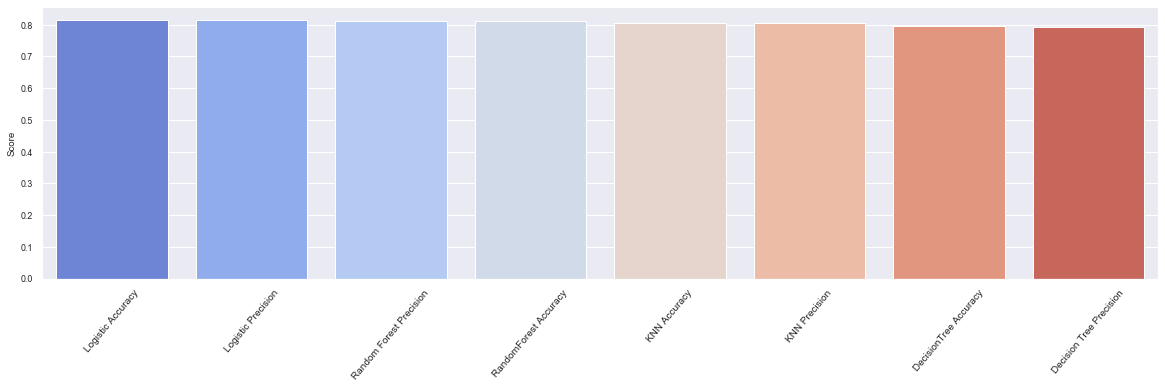

In [67]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_accu_dict.index,y = t2_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics

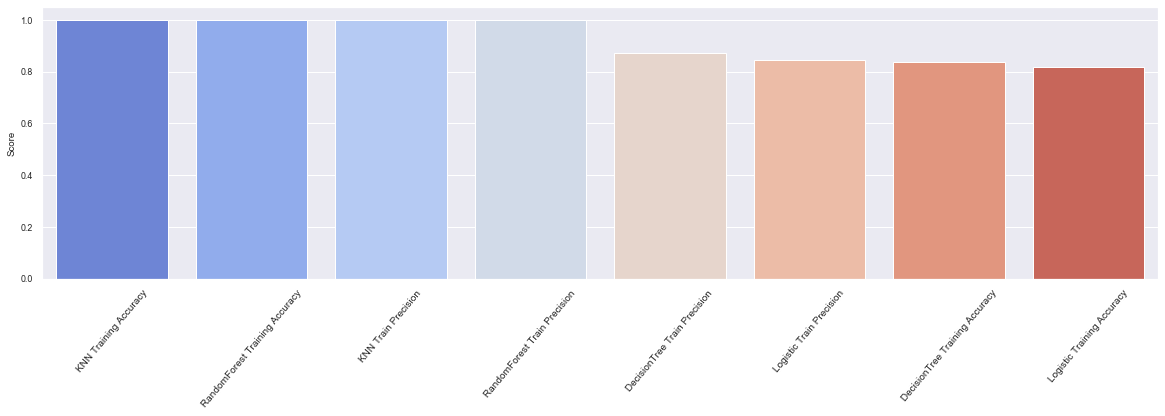

In [68]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_train_dict.index,y = t2_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics

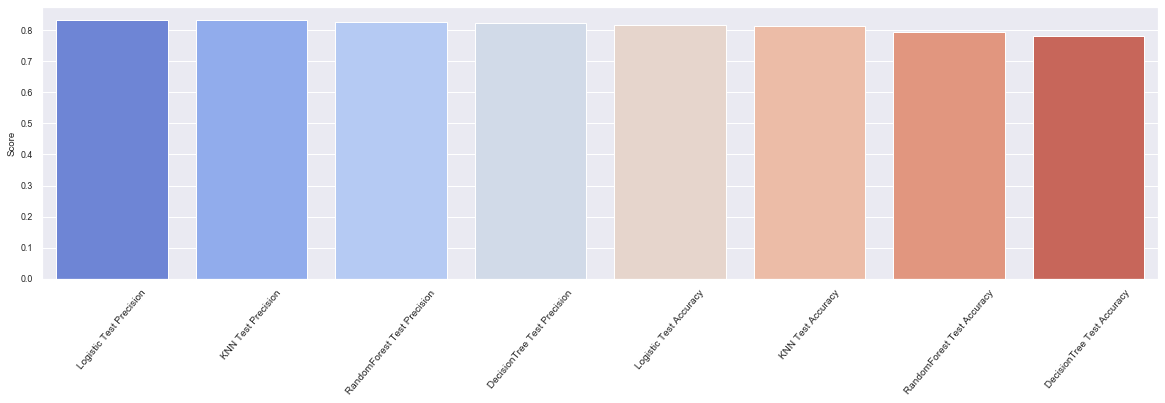

In [69]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_test_dict.index,y = t2_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics With Optimal Hyperparameter

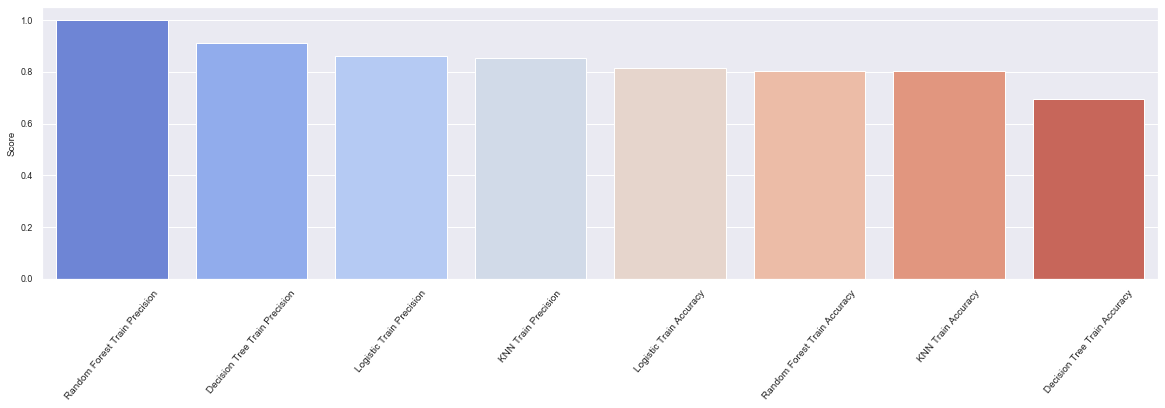

In [70]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_optimal_train_dict.index,y = t2_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics With Optimal Hyperparameter

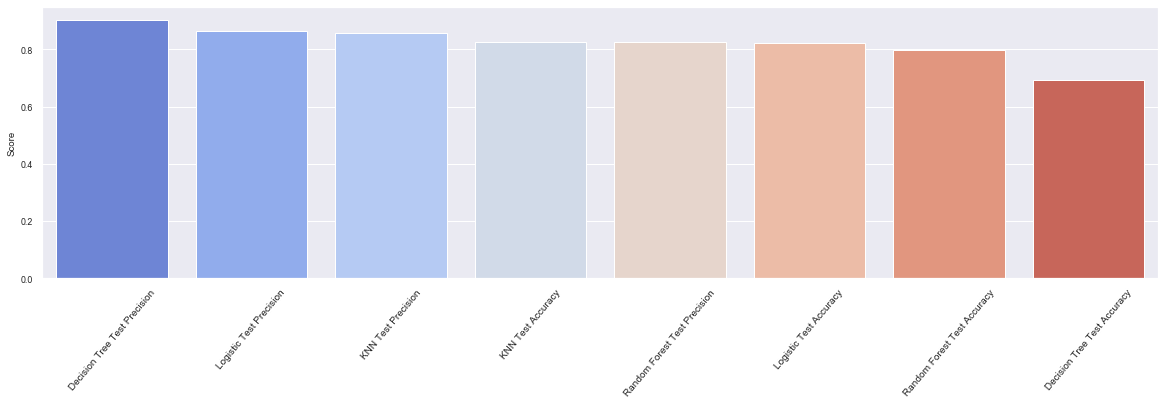

In [71]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_optimal_test_dict.index,y = t2_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

# Trial 3

In [72]:
# To store results of models in trial 1
t3_accu_dict = {}

t3_train_dict = {}
t3_test_dict = {}

t3_optimal_train_dict = {}
t3_optimal_test_dict = {}

In [73]:
# split the data into testing and training sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.20, random_state=1717)
print("Shape of input data X_train: {} and shape of target variable y_train: {}".format(X3_train.shape, y3_train.shape))
print("Shape of input data X_test: {} and shape of target variable y_test: {}".format(X3_test.shape, y3_test.shape))

Shape of input data X_train: (1508, 12) and shape of target variable y_train: (1508,)
Shape of input data X_test: (377, 12) and shape of target variable y_test: (377,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [74]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X3_train, y3_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 87.44% | outer ACC 70.20%
outer fold 1/5 | tuning KNN      | inner ACC 86.27% | outer ACC 76.82%
outer fold 1/5 | tuning Logistic | inner ACC 86.07% | outer ACC 80.79%
outer fold 1/5 | tuning RandomForest | inner ACC 84.25% | outer ACC 80.79%
outer fold 2/5 | tuning DecisionTree | inner ACC 86.01% | outer ACC 74.17%
outer fold 2/5 | tuning KNN      | inner ACC 85.79% | outer ACC 78.81%
outer fold 2/5 | tuning Logistic | inner ACC 86.70% | outer ACC 77.48%
outer fold 2/5 | tuning RandomForest | inner ACC 85.01% | outer ACC 78.48%
outer fold 3/5 | tuning DecisionTree | inner ACC 86.77% | outer ACC 71.52%
outer fold 3/5 | tuning KNN      | inner ACC 85.38% | outer ACC 83.44%
outer fold 3/5 | tuning Logistic | inner ACC 85.33% | outer ACC 83.77%
outer fold 3/5 | tuning RandomForest | inner ACC 84.81% | outer ACC 82.12%
outer fold 4/5 | tuning DecisionTree | inner ACC 89.32% | outer ACC 68.11%
outer fold 4/5 | tuning KNN      | inner ACC 84.4

Accuracy 81.10% (average over CV test folds)
Best Parameters: {'classifier__n_neighbors': 240, 'classifier__weights': 'uniform'}
Training Accuracy: 80.97%
Test Accuracy: 79.31%
Wall time: 1min 36s


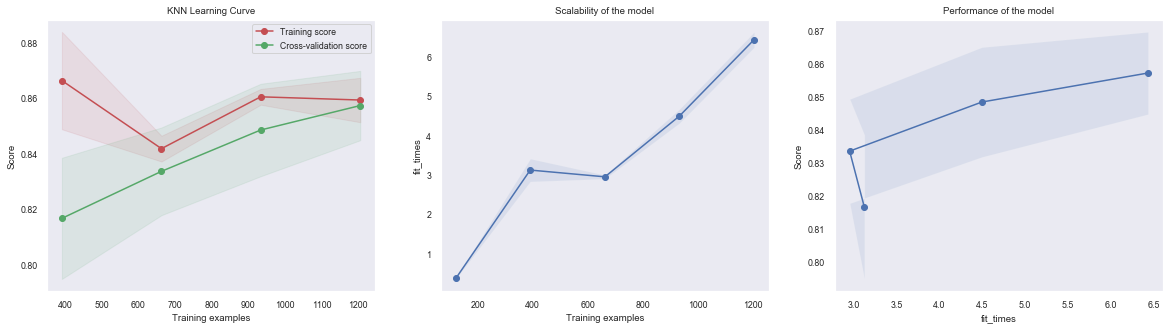

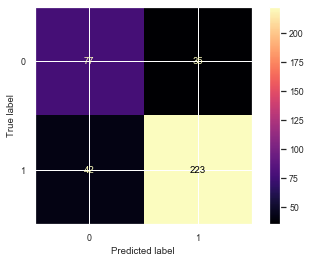

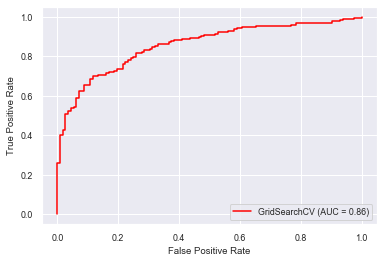

In [75]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t3_algo('KNN'), 'KNN', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'KNN Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X3_test, y3_test, c ='red');

Accuracy 81.63% (average over CV test folds)
Best Parameters: {'classifier__max_features': 8}
Training Accuracy: 100.00%
Test Accuracy: 77.72%
Wall time: 8min 14s


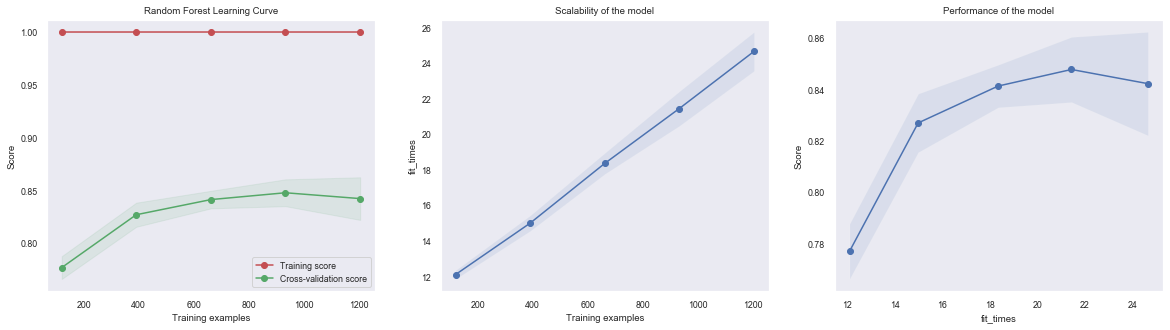

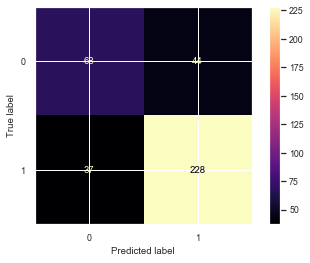

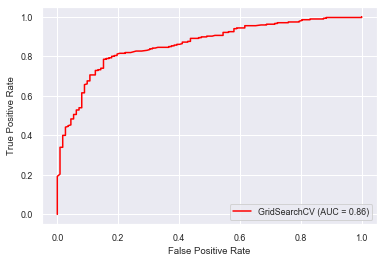

In [76]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t3_algo('RandomForest'), 'RandomForest', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'RandomForest Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X3_test, y3_test, c ='red');

Accuracy 81.70% (average over CV test folds)
Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Training Accuracy: 82.10%
Test Accuracy: 81.17%
Wall time: 8.85 s


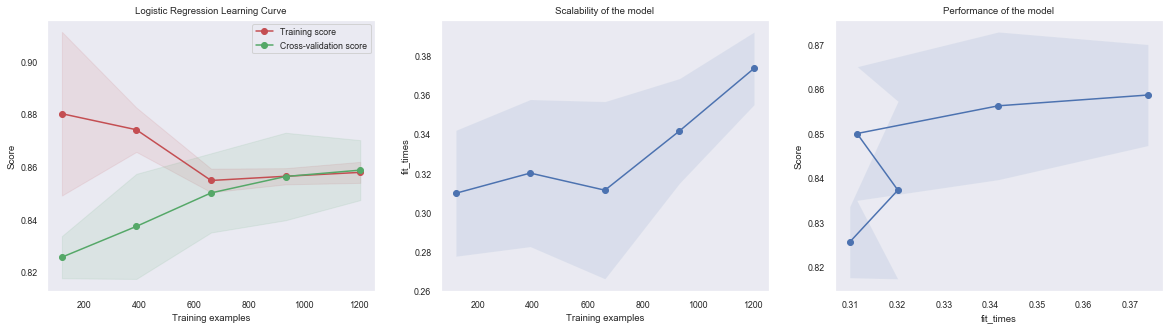

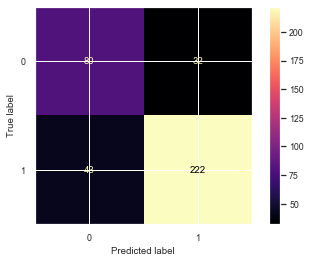

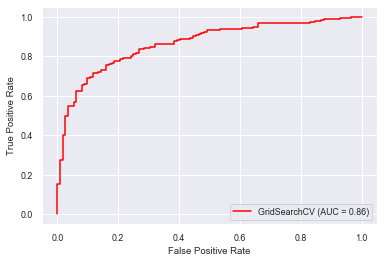

In [77]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t3_algo('Logistic'), 'Logistic', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Logistic Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X3_test, y3_test, c ='red');

Accuracy 77.92% (average over CV test folds)
Best Parameters: {'classifier__max_depth': 3}
Training Accuracy: 78.78%
Test Accuracy: 76.39%
Wall time: 7.82 s


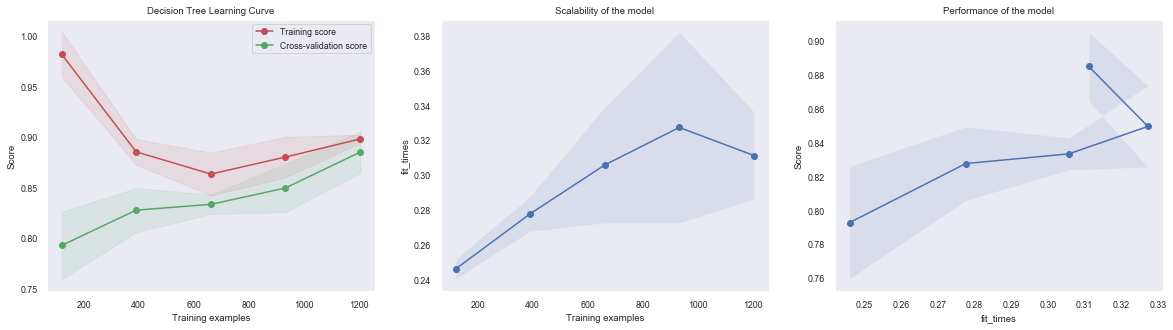

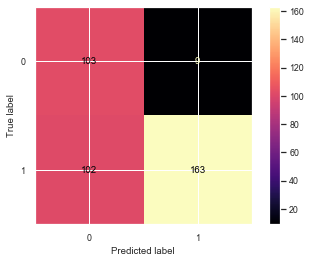

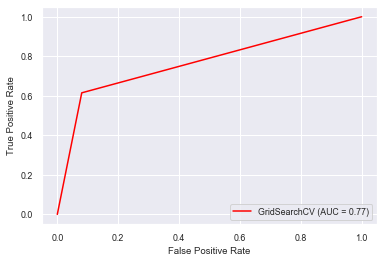

In [78]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t3_algo('DecisionTree'), 'DecisionTree', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'DecisionTree Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X3_test, y3_test, c ='red');

In [79]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('distance', 45, 12, 1, 1, 'l2', X3_train, y3_train, X3_test, y3_test,t3_optimal_train_dict,t3_optimal_test_dict)

KNN Train Accuracy 0.803718290026622
KNN Test Accuracy 0.7851458885941645
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       112
           1       0.86      0.83      0.84       265

    accuracy                           0.79       377
   macro avg       0.74      0.76      0.75       377
weighted avg       0.79      0.79      0.79       377

Random Forest Train Accuracy 0.807698400475237
Random Forest Test Accuracy 0.7745358090185677
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       112
           1       0.83      0.85      0.84       265

    accuracy                           0.77       377
   macro avg       0.73      0.72      0.73       377
weighted avg       0.77      0.77      0.77       377

Logistic Train Accuracy 0.8116807110954655
Logistic Test Accuracy 0.8037135278514589
              precision    recall  f1-score   support

           0       0.66      0.71     

## Precision Performance

### Model 'refit' set to precision

In [83]:
train_algo_prec(gridcvs, X3_train, y3_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 87.44% | outer prec 89.29%
outer fold 1/5 | tuning KNN      | inner prec 86.27% | outer prec 83.16%
outer fold 1/5 | tuning Logistic | inner prec 86.07% | outer prec 85.86%
outer fold 1/5 | tuning RandomForest | inner prec 84.20% | outer prec 85.07%
outer fold 2/5 | tuning DecisionTree | inner prec 86.01% | outer prec 80.50%
outer fold 2/5 | tuning KNN      | inner prec 85.79% | outer prec 82.38%
outer fold 2/5 | tuning Logistic | inner prec 86.70% | outer prec 81.43%
outer fold 2/5 | tuning RandomForest | inner prec 84.95% | outer prec 80.18%
outer fold 3/5 | tuning DecisionTree | inner prec 86.77% | outer prec 90.71%
outer fold 3/5 | tuning KNN      | inner prec 85.38% | outer prec 86.41%
outer fold 3/5 | tuning Logistic | inner prec 85.33% | outer prec 86.12%
outer fold 3/5 | tuning RandomForest | inner prec 84.30% | outer prec 86.19%
outer fold 4/5 | tuning DecisionTree | inner prec 89.32% | outer prec 91.94%
outer fold 4/5 | tuning

Precision 81.10% (average over CV test folds)
Training Precision: 84.92%
Test Precision: 86.10%
Wall time: 1min 39s


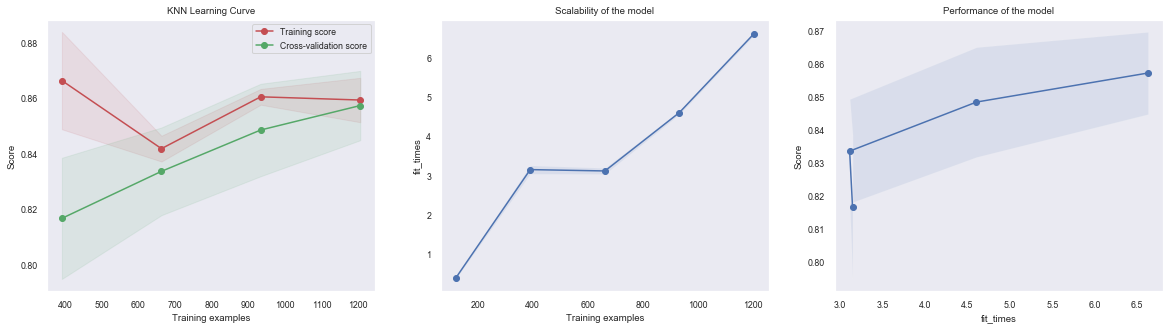

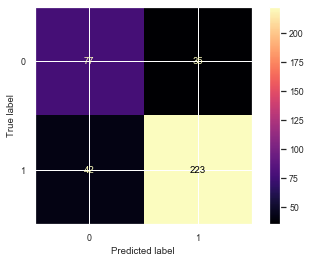

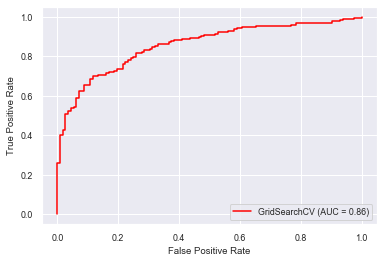

In [84]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('KNN'), 'KNN', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'KNN Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X3_test, y3_test, c ='red');

Precision 81.57% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 83.21%
Wall time: 8min 23s


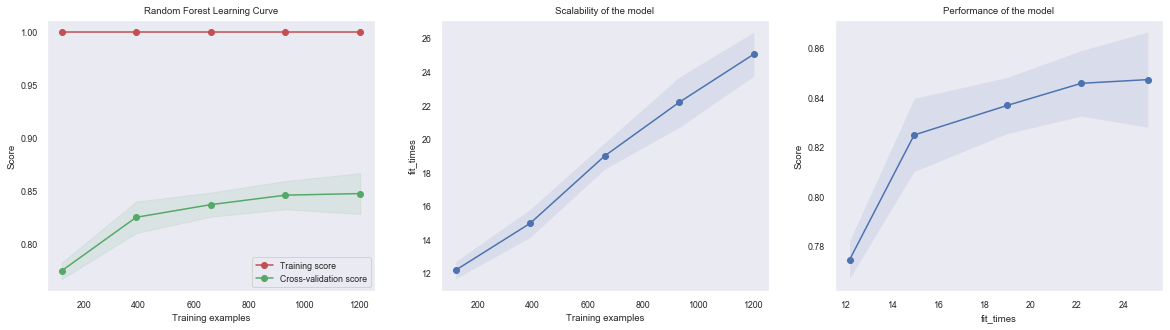

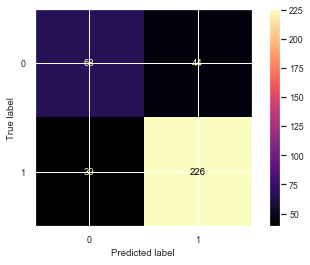

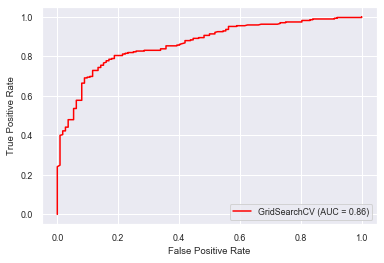

In [85]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('RandomForest'), 'RandomForest', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Random Forest Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X3_test, y3_test, c ='red');

Precision 81.70% (average over CV test folds)
Training Precision: 84.76%
Test Precision: 85.66%
Wall time: 8.83 s


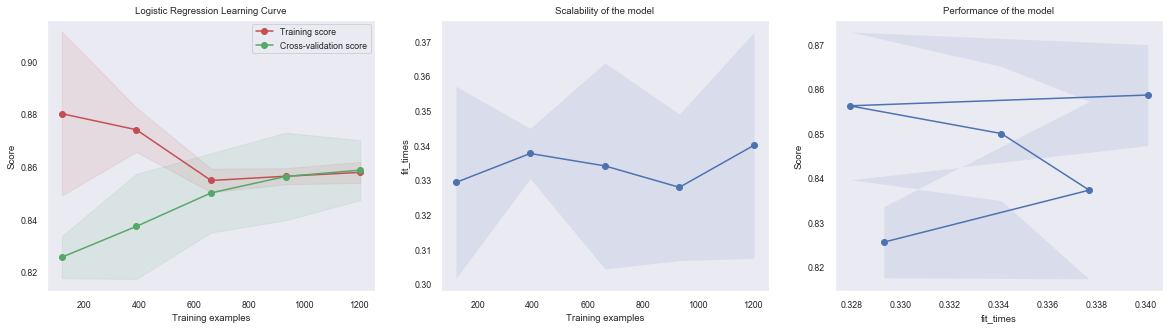

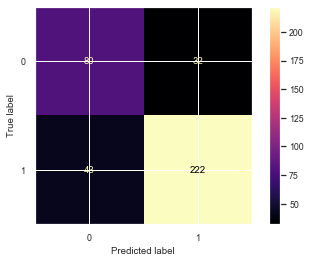

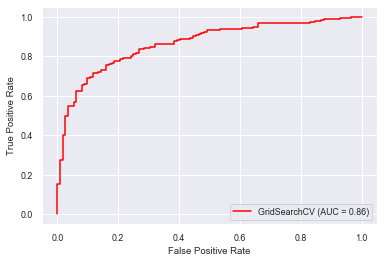

In [86]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('Logistic'), 'Logistic', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Logistic Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X3_test, y3_test, c ='red');

Precision 77.92% (average over CV test folds)
Training Precision: 85.34%
Test Precision: 86.07%
Wall time: 7.41 s


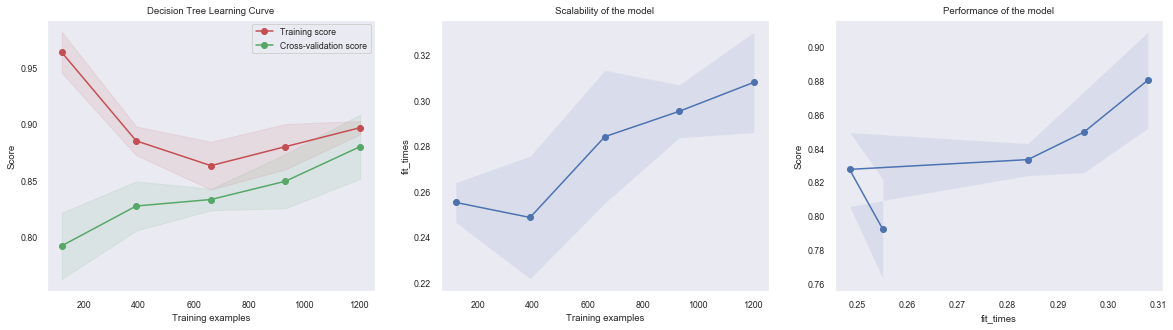

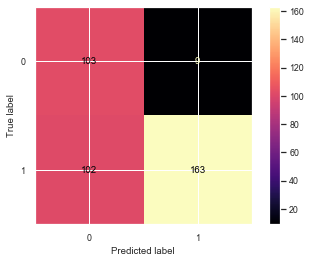

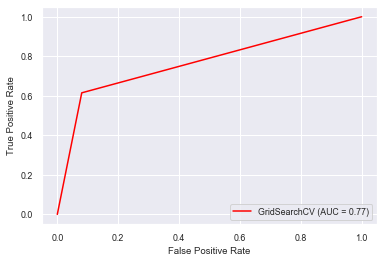

In [87]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('DecisionTree'), 'DecisionTree', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Decision Tree Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X3_test, y3_test, c ='red');

In [88]:
optimized_prec('distance', 45, 8, 1, 1, 'l2', X3_train, y3_train, X3_test, y3_test,t3_optimal_train_dict,t3_optimal_test_dict)

KNN Train Precision 1.0
KNN Test Precision 0.8622047244094488
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       112
           1       0.86      0.83      0.84       265

    accuracy                           0.79       377
   macro avg       0.74      0.76      0.75       377
weighted avg       0.79      0.79      0.79       377

Random Forest Train Precision 1.0
Random Forest Test Precision 0.8284671532846716
              precision    recall  f1-score   support

           0       0.63      0.58      0.60       112
           1       0.83      0.86      0.84       265

    accuracy                           0.77       377
   macro avg       0.73      0.72      0.72       377
weighted avg       0.77      0.77      0.77       377

Logistic Train Precision 0.8551859099804305
Logistic Test Precision 0.8745098039215686
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       112
      

## Results: Trial 3

In [89]:
t3_df_accu_dict = pd.DataFrame.from_dict(t3_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_train_dict = pd.DataFrame.from_dict(t3_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_test_dict = pd.DataFrame.from_dict(t3_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_optimal_train_dict = pd.DataFrame.from_dict(t3_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_optimal_test_dict = pd.DataFrame.from_dict(t3_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [90]:
print("Average Accuracy Across Folds")
print(t3_df_accu_dict)
print("")
print("Training Metric Scores")
print(t3_df_train_dict)
print("")
print("Testing Metric Scores")
print(t3_df_test_dict)
print("")
print("Training Metric Scores For Optimal Parameter")
print(t3_df_optimal_train_dict)
print("")
print("Testing Metric Scores For Optimal Parameter")
print(t3_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
Logistic Accuracy        0.816990
Logistic Precision       0.816990
RandomForest Accuracy    0.816319
Random Forest Precision  0.815659
KNN Accuracy             0.811025
KNN Precision            0.811025
DecisionTree Accuracy    0.779197
Decision Tree Precision  0.779197

Training Metric Scores
                                   Score
RandomForest Training Accuracy  1.000000
RandomForest Train Precision    1.000000
DecisionTree Train Precision    0.853430
KNN Train Precision             0.849167
Logistic Train Precision        0.847619
Logistic Training Accuracy      0.820955
KNN Training Accuracy           0.809682
DecisionTree Training Accuracy  0.787798

Testing Metric Scores
                                Score
KNN Test Precision           0.861004
DecisionTree Test Precision  0.860656
Logistic Test Precision      0.856618
RandomForest Test Precision  0.832090
Logistic Test Accuracy       0.811671
KNN Test Accuracy   

## Visualizations

### Average Accuracies Across Folds

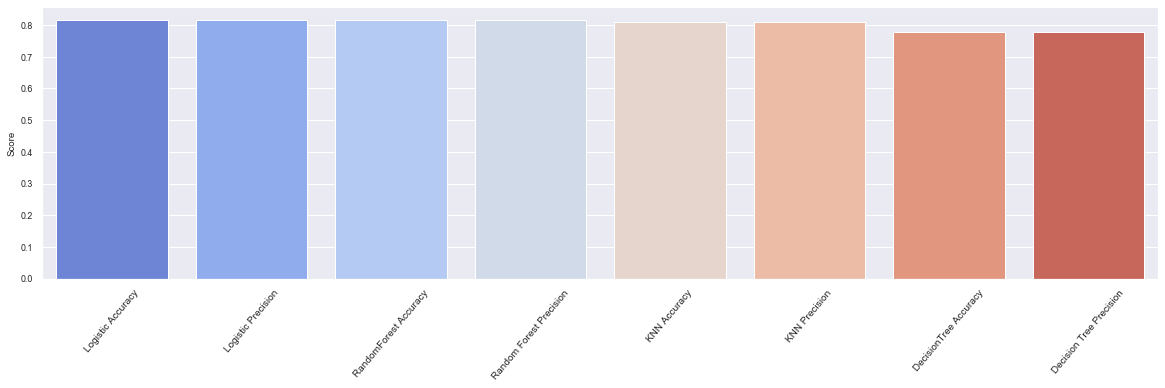

In [91]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_accu_dict.index,y = t3_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics

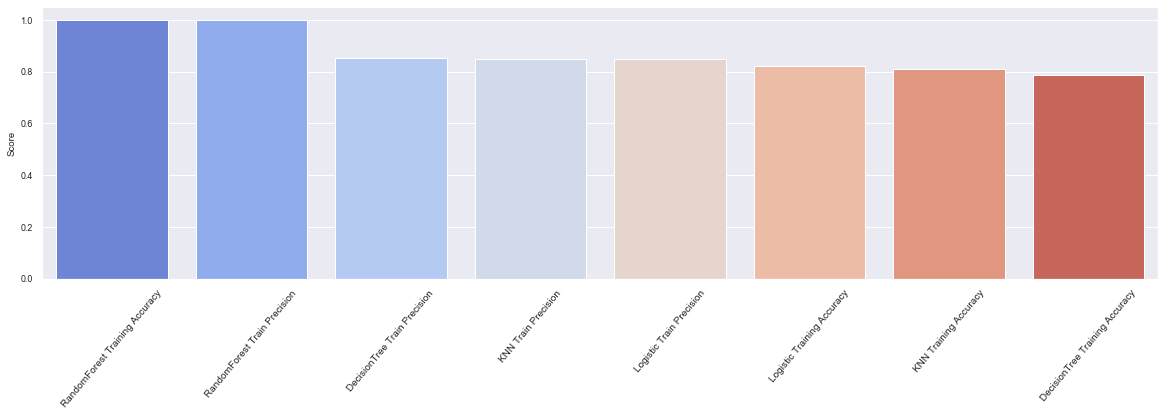

In [92]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_train_dict.index,y = t3_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics

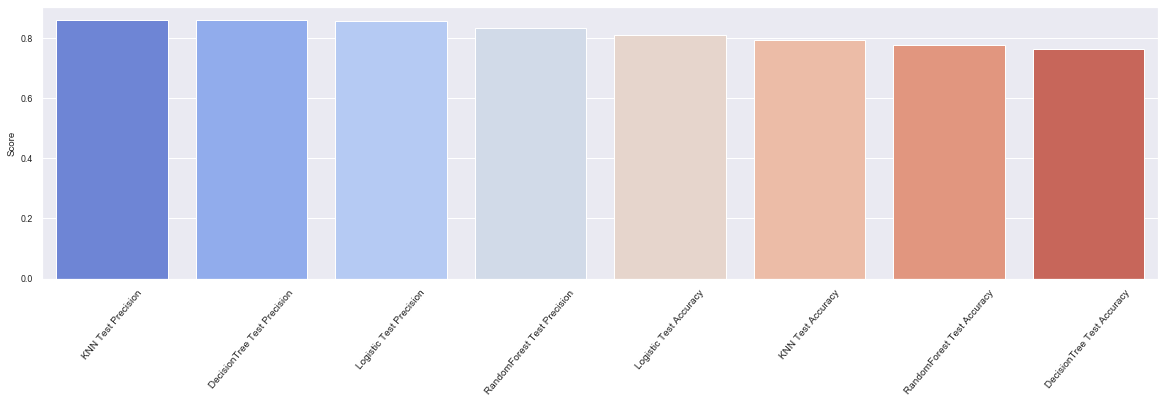

In [93]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_test_dict.index,y = t3_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics With Optimal Hyperparameter

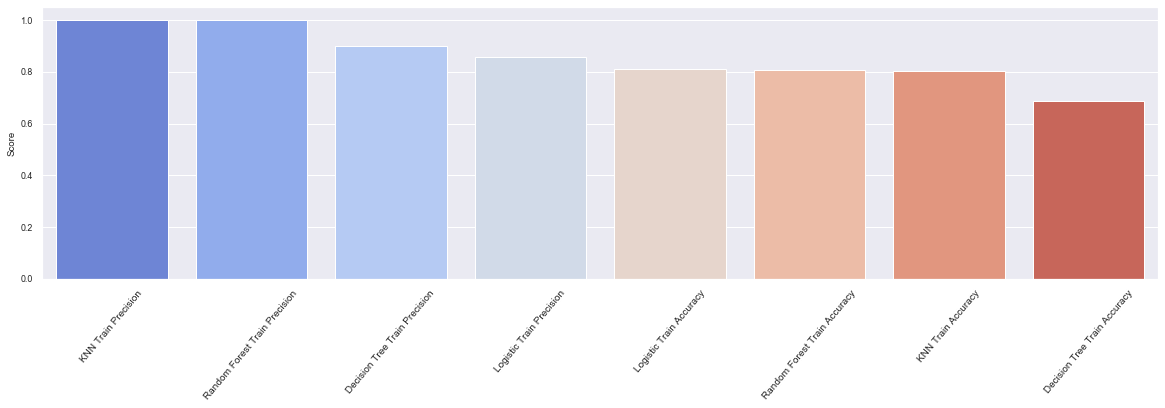

In [94]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_optimal_train_dict.index,y = t3_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics With Optimal Hyperparameter

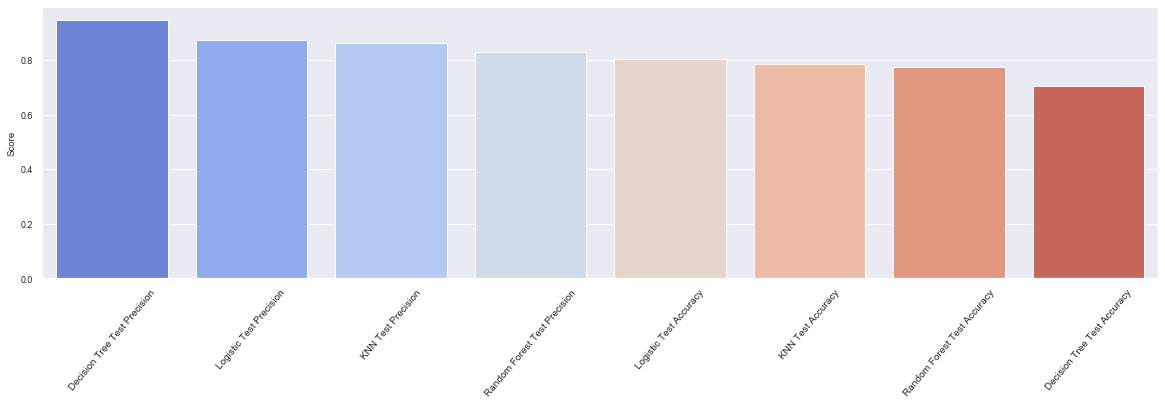

In [95]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_optimal_test_dict.index,y = t3_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

# Results: All Trials

## Averaging Results Across Trials

### Average Accuracy 

In [96]:
# taking the average across all 3 trials for average accuracy across 5 folds
# combining all results into a single dataframe grouping by metric and summing those values, divide 3 to get average 
# across all trials

df_avearge_accuracy = pd.concat([t1_df_accu_dict, t2_df_accu_dict, t2_df_accu_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_accuracy

Score
Logistic Accuracy        0.815864
Logistic Precision       0.815864
Random Forest Precision  0.813445
RandomForest Accuracy    0.812556
KNN Accuracy             0.807684
KNN Precision            0.807684
DecisionTree Accuracy    0.792446
Decision Tree Precision  0.790677

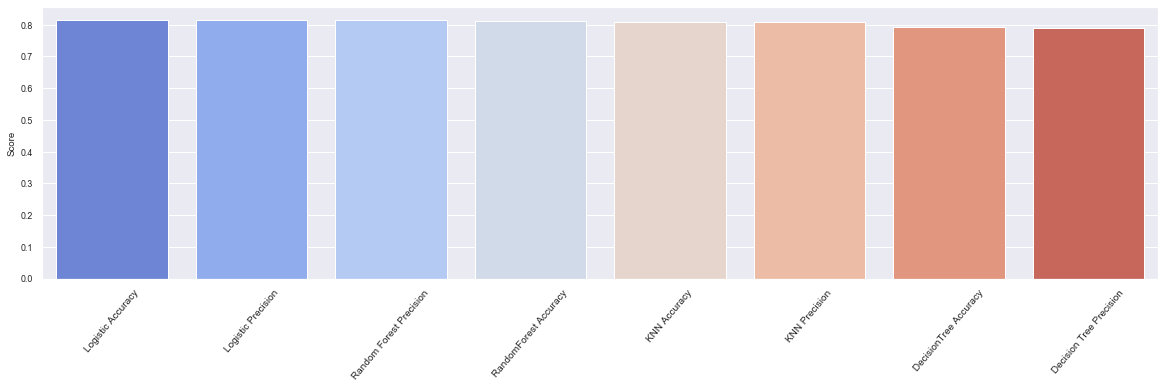

In [97]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_accuracy.index,y = df_avearge_accuracy.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_accuracy.index,rotation = 50, fontsize = 10)

plt.show()

### Average Training Scores

In [98]:
# taking the average across all 3 trials for average training scores 
# combining all results into a single dataframe grouping by metric and summing those values, divide 3 to get average 
# across all trials

df_avearge_train = pd.concat([t1_df_train_dict, t2_df_train_dict, t3_df_train_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_train

Score
RandomForest Train Precision    1.000000
RandomForest Training Accuracy  1.000000
KNN Train Precision             0.949722
KNN Training Accuracy           0.936561
DecisionTree Train Precision    0.862149
Logistic Train Precision        0.845840
Logistic Training Accuracy      0.819408
DecisionTree Training Accuracy  0.813660

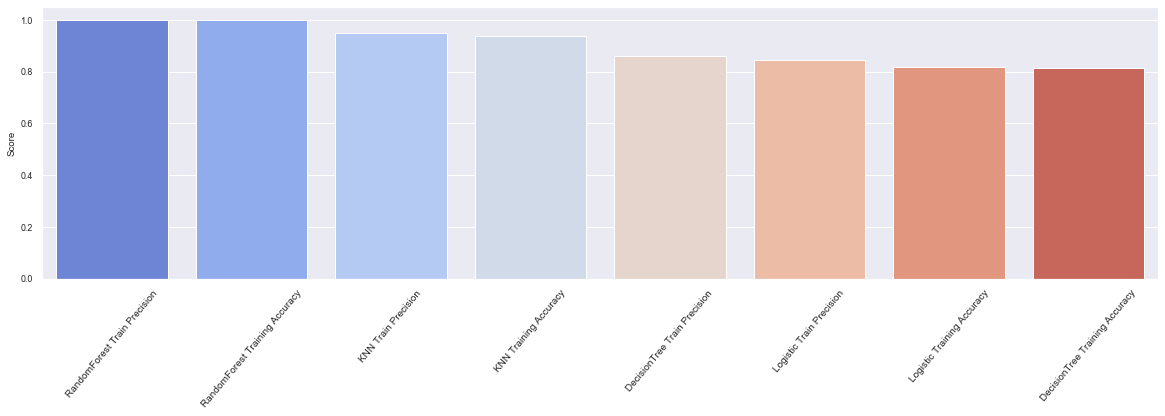

In [99]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_train.index,y = df_avearge_train.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_train.index,rotation = 50, fontsize = 10)

plt.show()

### Average Testing Scores

In [100]:
# taking the average across all 3 trials for average testing scores 
# combining all results into a single dataframe grouping by metric and summing those values, divide 3 to get average 
# across all trials

df_avearge_test = pd.concat([t1_df_test_dict, t2_df_test_dict, t3_df_test_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_test

Score
KNN Test Precision           0.856660
DecisionTree Test Precision  0.850573
Logistic Test Precision      0.850183
RandomForest Test Precision  0.845444
Logistic Test Accuracy       0.810787
KNN Test Accuracy            0.801061
RandomForest Test Accuracy   0.791335
DecisionTree Test Accuracy   0.773652

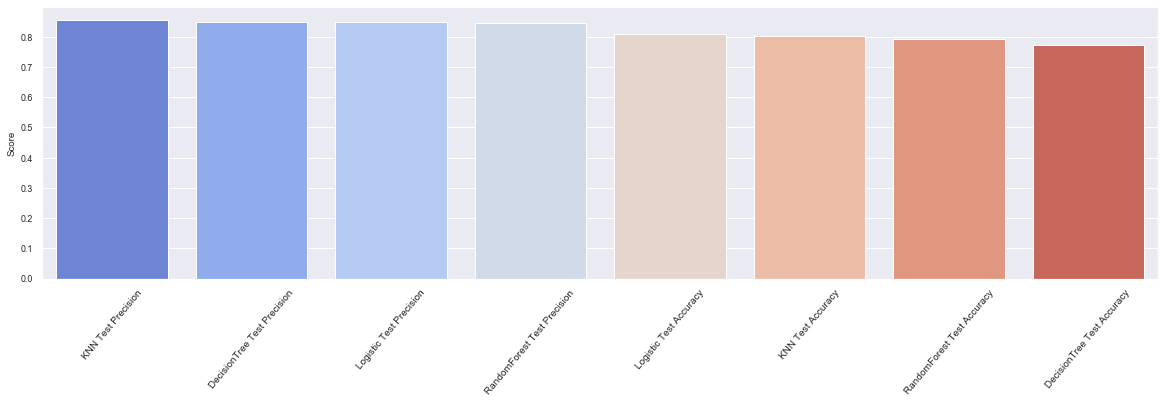

In [101]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_test.index,y = df_avearge_test.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_test.index,rotation = 50, fontsize = 10)

plt.show()

### Average Training Scores With Optimal Parameters

In [102]:
# taking the average across all 3 trials for average training scores w/ optimal hyperparameters
# combining all results into a single dataframe grouping by metric and summing those values, divide 3 to get average 
# across all trials

df_avearge_optimal_train = pd.concat([t1_df_optimal_train_dict, t2_df_optimal_train_dict, t3_df_optimal_train_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_optimal_train

Score
Random Forest Train Precision  1.000000
Decision Tree Train Precision  0.903710
KNN Train Precision            0.903033
Logistic Train Precision       0.856885
Logistic Train Accuracy        0.813431
Random Forest Train Accuracy   0.807030
KNN Train Accuracy             0.801941
Decision Tree Train Accuracy   0.722592

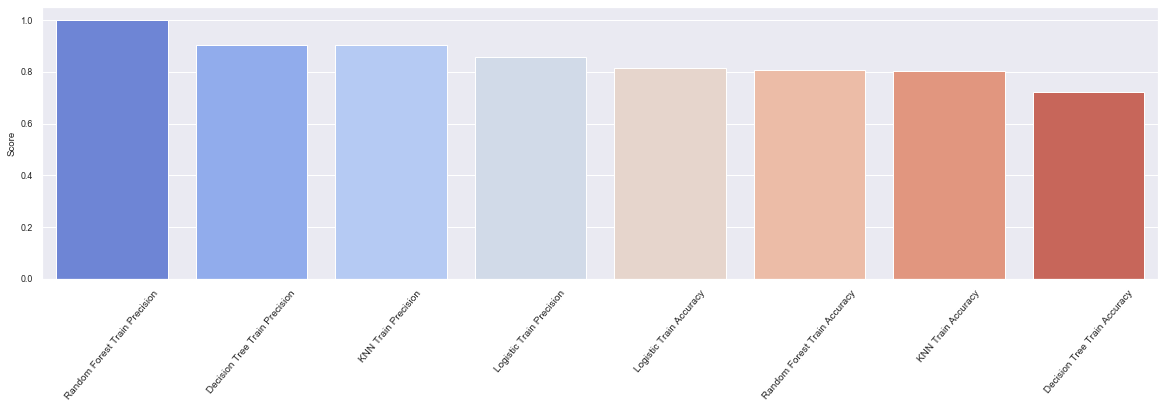

In [103]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_optimal_train.index,y = df_avearge_optimal_train.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_optimal_train.index,rotation = 50, fontsize = 10)

plt.show()

### Average Testing Scores With Optimal Parameters

In [104]:
# taking the average across all 3 trials for average testing scores w/ optimal hyperparameters
# combining all results into a single dataframe grouping by metric and summing those values, divide 3 to get average 
# across all trials

df_avearge_optimal_test = pd.concat([t1_df_optimal_test_dict, t2_df_optimal_test_dict, t3_df_optimal_test_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_optimal_test

Score
Decision Tree Test Precision  0.926901
Logistic Test Precision       0.876278
KNN Test Precision            0.868815
Random Forest Test Precision  0.846793
Logistic Test Accuracy        0.809019
KNN Test Accuracy             0.796640
Random Forest Test Accuracy   0.793988
Decision Tree Test Accuracy   0.724138

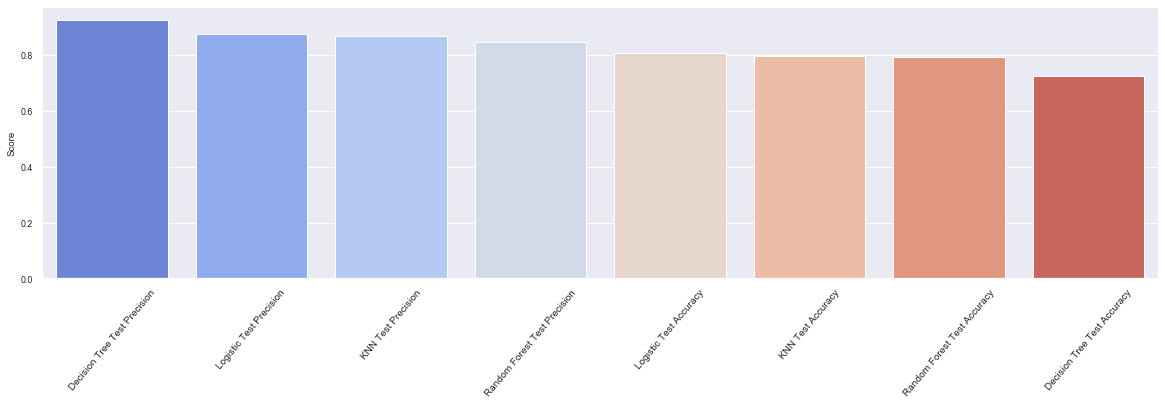

In [105]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_optimal_test.index,y = df_avearge_optimal_test.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_optimal_test.index,rotation = 50, fontsize = 10)

plt.show()